<font size="+2"> Machine Learning Project - Global Data on Sustainable Energy</font>

**Date:** 27th of May 2024

**Authors:** Elsa Dhnt, Jonas Gran Melandsør, Thai Doãn Kiên

4GMM, INSA Toulouse

# Introduction

The Global Data on Substainable Energy is a dataset from the [website of the KAGGLE competition](https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy). It includes data for $21$ different varaibles, such as CO2-emission, percentage of countries power consumption that is renewable, etc., for $176$ countries during the time periode $2000-2020$. We have used this data to predict the CO2-emissions using linear regression, support vector machine regression, CART, random forest, boosting and neural networks. We are comparing the methods by looking at the error of the training and test samples separate, as well as their time consumption. We are also comparing the performance of different techniques for handeling missing values.

In [1]:
import pandas as pd
import numpy as np
import copy
import random
import itertools
%matplotlib inline
import matplotlib.pyplot as plt
import time
import seaborn as sns

In [2]:
globDat = pd.read_csv("global-data-on-sustainable-energy.csv",sep=",",header=0)
print(f'Size of dataset: {globDat.shape}')
globDat.head()


Size of dataset: (3649, 21)


Entity  Year  Access to electricity (% of population)  \
0  Afghanistan  2000                                 1.613591   
1  Afghanistan  2001                                 4.074574   
2  Afghanistan  2002                                 9.409158   
3  Afghanistan  2003                                14.738506   
4  Afghanistan  2004                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                               7.75      

   Financial flows to developing countries (US $)  \
0                                         20000.0   
1                                        130000.0   
2                                       3950000.0   
3                                      25970000.0   
4                                             NaN   

   Renewable energy share in the total final energy consumption (%)  \
0                                              44.99                  
1                                              45.60                  
2                                              37.83                  
3                                              36.66                  
4                                              44.24                  

   Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
0                                 0.16                             0.0   
1                                 0.09                             0.0   
2                                 0.13                             0.0   
3                                 0.31                             0.0   
4                                 0.33                             0.0   

   Electricity from renewables (TWh)  ...  \
0                               0.31  ...   
1                               0.50  ...   
2                               0.56  ...   
3                               0.63  ...   
4                               0.56  ...   

   Primary energy consumption per capita (kWh/person)  \
0                                          302.59482    
1                                          236.89185    
2                                          210.86215    
3                                          229.96822    
4                                          204.23125    

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
0                                               1.64             
1                                               1.74             
2                                               1.40             
3                                               1.40             
4                                               1.20             

   Value_co2_emissions_kt_by_country  \
0                         760.000000   
1                         730.000000   
2                        1029.999971   
3                        1220.000029   
4                        1029.999971   

   Renewables (% equivalent primary energy)  gdp_growth  gdp_per_capita  \
0                                       NaN         NaN             NaN   
1                                       NaN         NaN             NaN   
2                                       NaN         NaN      179.426579   
3                                       NaN    8.832278      190.683814   
4                                       NaN    1.414118      211.382074   

   Density\n(P/Km2) Land Area(Km2)  Latitude  Longitude  
0                60       652230.0  33.93911  67.709953  
1          

## 1) Preparation of the dataset

In [3]:
globDat.dtypes

Entity                                                               object
Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable-electricity-generating-capacity-per-capita                float64
Financial flows to developing countries (US $)                      float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
Value_co2_em

The column "Density\n(P/Km2)" is defined as object with elements being string, where "," is used to seperate between thousand and hundred. We want to make "Density\n(P/Km2)" into float. We also want to convert the values of the "Year" column into object, such that it is a qualitative variable. 

In [4]:
globDat['Density\\n(P/Km2)']=globDat["Density\\n(P/Km2)"].str.replace(",","")  # Removing "," from string since it used as a thousand separator
globDat['Density\\n(P/Km2)']=globDat["Density\\n(P/Km2)"].astype(float)        # Converting to floats
globDat['Year']=globDat["Year"].astype(object)
globDat['Year']=pd.to_numeric(globDat['Year'],errors='coerce')
globDat['Entity']=pd.Categorical(globDat['Entity'],ordered=False)
globDat.dtypes


Entity                                                              category
Year                                                                   int64
Access to electricity (% of population)                              float64
Access to clean fuels for cooking                                    float64
Renewable-electricity-generating-capacity-per-capita                 float64
Financial flows to developing countries (US $)                       float64
Renewable energy share in the total final energy consumption (%)     float64
Electricity from fossil fuels (TWh)                                  float64
Electricity from nuclear (TWh)                                       float64
Electricity from renewables (TWh)                                    float64
Low-carbon electricity (% electricity)                               float64
Primary energy consumption per capita (kWh/person)                   float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          float64

## 2) Determine the rate of missing values for each variable.

Is the dataset complete? To check this we search for missing values.

In [5]:
globDat_missing_value = globDat.isna().sum().sort_values(ascending=False)

print(f'\nNumber of duplicate values: {globDat_missing_value.duplicated().sum()}')


print(f'Number of missing values: {globDat_missing_value.sum()}\n')
print('Overview missing values:\n')
print(globDat_missing_value)





Number of duplicate values: 6
Number of missing values: 6978

Overview missing values:

Renewables (% equivalent primary energy)                            2137
Financial flows to developing countries (US $)                      2089
Renewable-electricity-generating-capacity-per-capita                 931
Value_co2_emissions_kt_by_country                                    428
gdp_growth                                                           317
gdp_per_capita                                                       282
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Renewable energy share in the total final energy consumption (%)     194
Access to clean fuels for cooking                                    169
Electricity from nuclear (TWh)                                       126
Low-carbon electricity (% electricity)                                42
Electricity from renewables (TWh)                                     21
Electricity from fossil fuels (TWh)

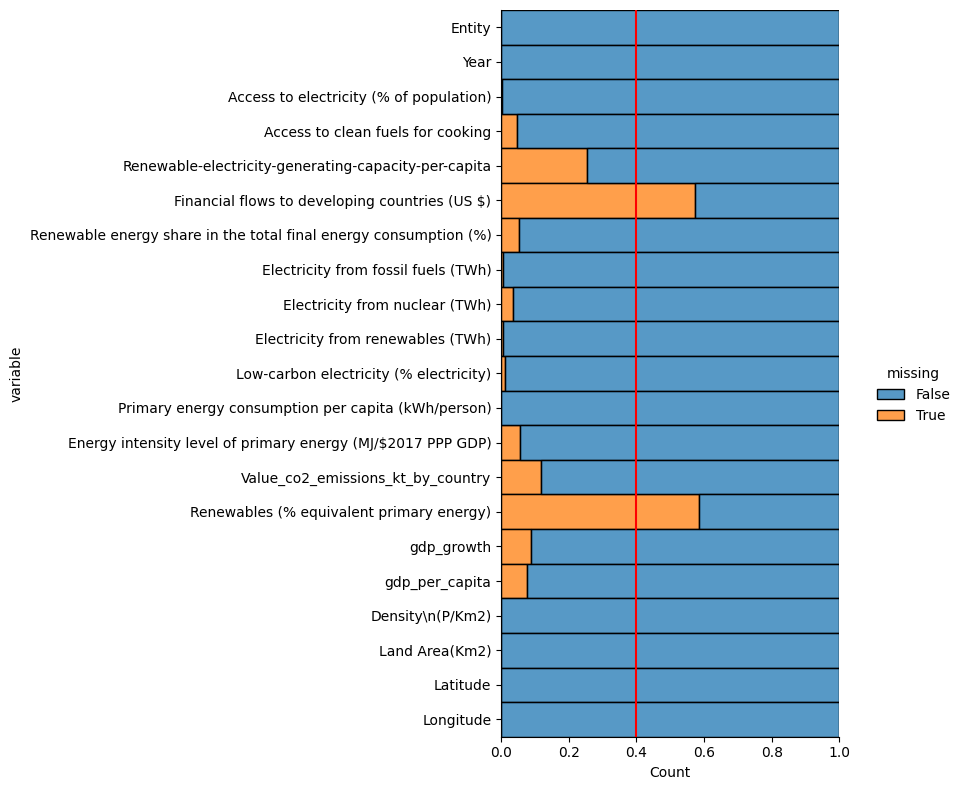

In [6]:
sns.displot(
    data=globDat.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    height=8,
    aspect=1.1
)

# specifying a threshold value
plt.axvline(0.4, color='r')

Since the variables "Renewables (% equivalent primary energy)", "Financial flows to developing countries (US $)", "Renewable-electricity-generating-capacity-per-capita" have hight rate of missing values, analysis of these data will have limitation for the validity, and therefore we remove them from the dataset.

In [7]:
globDat = globDat.drop(columns=['Renewables (% equivalent primary energy)', 'Financial flows to developing countries (US $)', 'Renewable-electricity-generating-capacity-per-capita'])

## 3) Create a dataset containing only those individuals with no missing values

In [8]:
# Creating dataset without missing data
globDatFull = globDat.dropna()
globDatFull

Entity  Year  Access to electricity (% of population)  \
3     Afghanistan  2003                                14.738506   
4     Afghanistan  2004                                20.064968   
5     Afghanistan  2005                                25.390894   
6     Afghanistan  2006                                30.718690   
7     Afghanistan  2007                                36.051010   
...           ...   ...                                      ...   
3643     Zimbabwe  2015                                33.700000   
3644     Zimbabwe  2016                                42.561730   
3645     Zimbabwe  2017                                44.178635   
3646     Zimbabwe  2018                                45.572647   
3647     Zimbabwe  2019                                46.781475   

      Access to clean fuels for cooking  \
3                                  9.50   
4                                 10.90   
5                                 12.20   
6                                 13.85   
7                                 15.30   
...                                 ...   
3643                              29.50   
3644                              29.80   
3645                              29.80   
3646                              29.90   
3647                              30.10   

      Renewable energy share in the total final energy consumption (%)  \
3                                                 36.66                  
4                                                 44.24                  
5                                                 33.88                  
6                                                 31.89                  
7                                                 28.78                  
...                                                 ...                  
3643                                              80.82                  
3644                                              81.90                  
3645                                              82.46                  
3646                                              80.23                  
3647                                              81.50                  

      Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
3                                    0.31                             0.0   
4                                    0.33                             0.0   
5                                    0.34                             0.0   
6                                    0.20                             0.0   
7                                    0.20                             0.0   
...                                   ...                             ...   
3643                                 4.02                             0.0   
3644                                 3.50                             0.0   
3645                                 3.05                             0.0   
3646                                 3.73                             0.0   
3647                                 3.66                             0.0   

      Electricity from renewables (TWh)  \
3                                  0.63   
4                                  0.56   
5                                  0.59   
6                                  0.64   
7                                  0.75   
...                                 ...   
3643                               5.37   
3644                               3.32   
3645                               4.30   
3646                               5.46   
3647                               4.58   

      Low-carbon electricity (% electricity)  \
3                                  67.021280   
4                                  62.921350   
5                                  63.440857   
6                                  76.190475   
7                                  78.947370   
...                                      ...   
3643      

In [9]:
globDatFull.describe()

Year  Access to electricity (% of population)  \
count  2868.000000                              2868.000000   
mean   2009.607043                                76.584630   
std       5.750605                                31.510371   
min    2000.000000                                 1.252269   
25%    2005.000000                                53.237811   
50%    2010.000000                                97.000000   
75%    2015.000000                               100.000000   
max    2019.000000                               100.000000   

       Access to clean fuels for cooking  \
count                        2868.000000   
mean                           62.170084   
std                            39.238548   
min                             0.000000   
25%                            22.075000   
50%                            81.550000   
75%                           100.000000   
max                           100.000000   

       Renewable energy share in the total final energy consumption (%)  \
count                                        2868.000000                  
mean                                           35.802071                  
std                                            30.024000                  
min                                             0.000000                  
25%                                             9.187500                  
50%                                            28.790000                  
75%                                            60.667500                  
max                                            96.040000                  

       Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
count                          2868.000000                     2868.000000   
mean                             76.693556                       15.337019   
std                             374.419806                       78.776075   
min                               0.000000                        0.000000   
25%                               0.290000                        0.000000   
50%                               2.995000                        0.000000   
75%                              25.787500                        0.000000   
max                            5098.220000                      809.410000   

       Electricity from renewables (TWh)  \
count                        2868.000000   
mean                           26.603375   
std                           107.640273   
min                             0.000000   
25%                             0.090000   
50%                             1.680000   
75%                            10.102500   
max                          2014.570000   

       Low-carbon electricity (% electricity)  \
count                             2868.000000   
mean                                39.629403   
std                                 34.454884   
min                                  0.000000   
25%                                  6.091074   
50%                                 35.009718   
75%                                 66.879318   
max                                100.000010   

       Primary energy consumption per capita (kWh/person)  \
count                                        2868.000000    
mean                                        26082.456843    
std                                         37097.457254    
min                                           105.110120    
25%                                          2779.966525    
50%                                         11922.761000    
75%                                         31838.556000    
max                                        262585.700000    

       Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
count                                        2868.000000             
mean                                            5.418111             
std                                             3.577415             
m

## 4) Unidimensional descriptive analysis

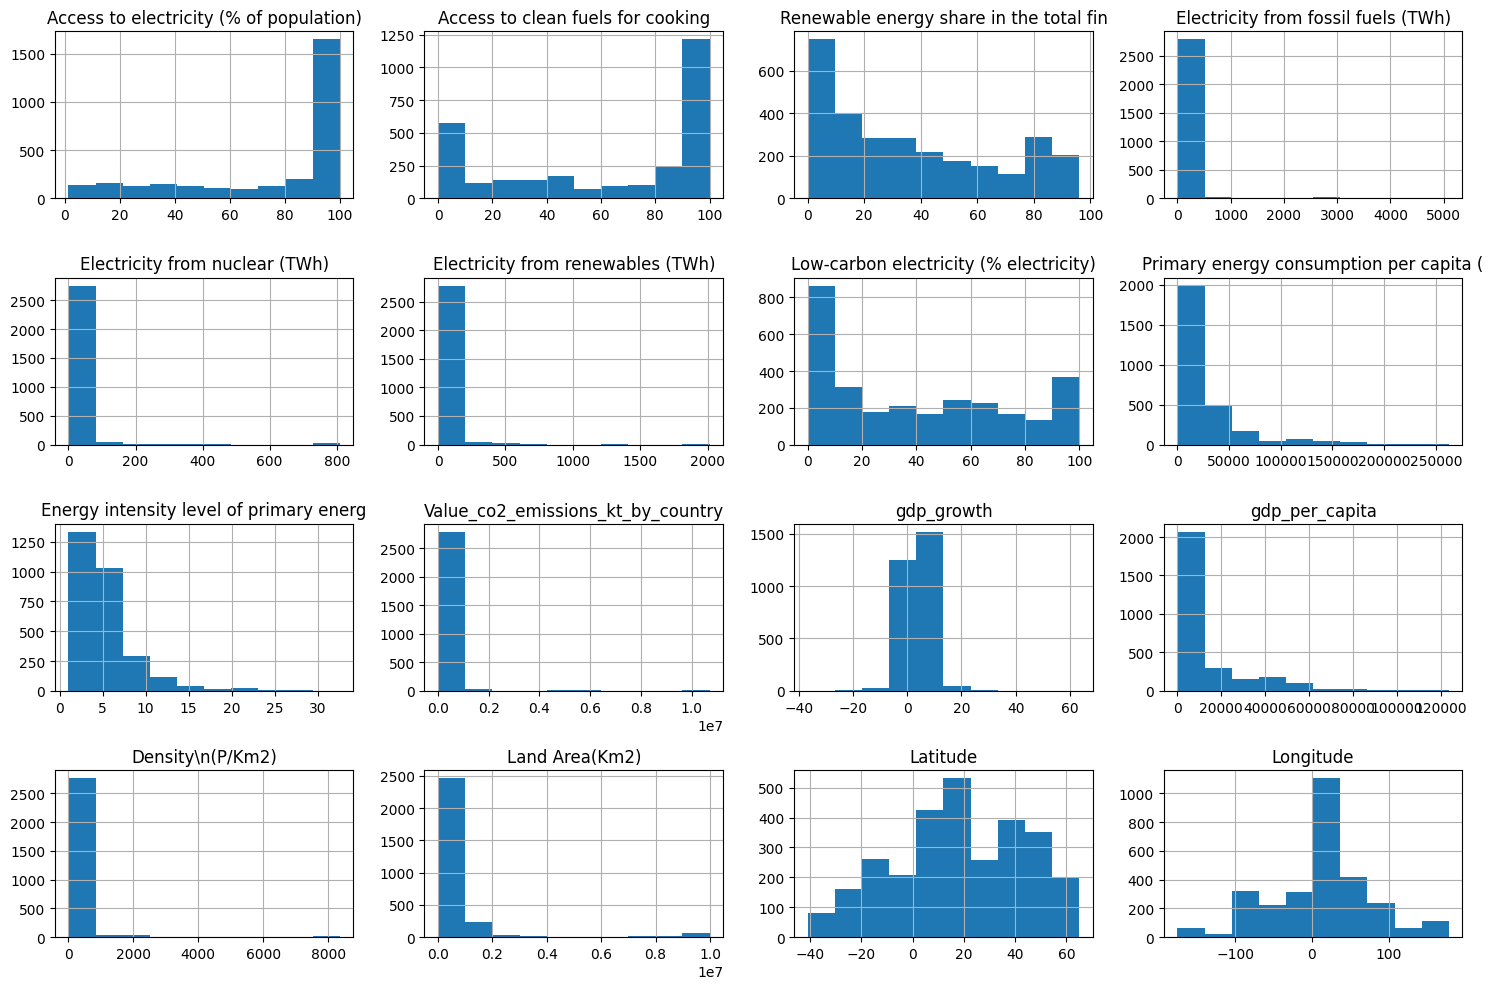

In [10]:
# Plotting histograms to see if unidimensional transformations are useful

plt.figure(figsize = (15,10))
for i, col in enumerate(globDatFull.select_dtypes(include='float64')):
    plt.subplot(4,4,i+1)
    globDatFull[col].hist()
    plt.title(col[:39])
    
plt.tight_layout()
plt.show()


Since the majority of the varaibles are skewed or with high representation at just one interval, quantitative transformation of the data are useful. 

Suggestion for data transformation:

Access to electricity (% of population): **Nothing**. Neither log and sqrt don't change much.

Access to clean fuels for cooking: **Nothing**. Log gives inf-values and sqrt doesn't do much.

Renewable energy share in the total final energy consumption (%): **sqrt**. This makes it more symmetric. log gives inf-values.

Electricity from fossil fuels (TWh): **log** makes it more symmetric.

Electricity from nuclear (TWh): **nothing** doesn't change

Electricity from renewables (TWh) **log**?

Low-carbon electricity (% electricity): **sqrt**?

Primary energy consumption per capita (kWh/person): **log**

Energy intensity level of primary energy (MJ/$2017 PPP GDP): **log**

Value_co2_emissions_kt_by_country: **log**

gdp_growth: **nothing**

gdp_per_capita: **log**

Density\n(P/Km2): **log**

Land Area(Km2): **log**

Latitude: **nothing**, already symmetric

Longitude: **nothing**, already symmetric

In [11]:
# from math import sqrt, log

globDatTrans = pd.DataFrame()
globDatTrans["Entity"]=globDatFull["Entity"]
globDatTrans["Year"]=globDatFull["Year"]
globDatTrans["S_ElecAcce"]=globDatFull["Access to electricity (% of population)"].map(lambda x: np.sqrt(x))
globDatTrans["S_CleFueAcce"]=globDatFull["Access to clean fuels for cooking"].map(lambda x: np.sqrt(x))
globDatTrans["S_%RenewEner"]=globDatFull["Renewable energy share in the total final energy consumption (%)"].map(lambda x: np.sqrt(x))
globDatTrans["L_FossElec"]=globDatFull["Electricity from fossil fuels (TWh)"].map(lambda x: np.log(x+1e-6))
globDatTrans["L_NuclElec"]=globDatFull["Electricity from nuclear (TWh)"].map(lambda x: np.log(x+1e-6))
globDatTrans["L_RenewElec"]=globDatFull["Electricity from renewables (TWh)"].map(lambda x: np.log(x+1e-6))
globDatTrans["S_LowCarbElec"]=globDatFull["Low-carbon electricity (% electricity)"].map(lambda x: np.sqrt(x))
globDatTrans["L_EnerCons/cpt"]=globDatFull["Primary energy consumption per capita (kWh/person)"].map(lambda x: np.log(x))
globDatTrans["L_EnerIntens"]=globDatFull["Energy intensity level of primary energy (MJ/$2017 PPP GDP)"].map(lambda x: np.log(x))
globDatTrans["L_CO2_emit"]=globDatFull["Value_co2_emissions_kt_by_country"].map(lambda x: np.log(x))
globDatTrans["gdp_growth"]=globDatFull["gdp_growth"]
globDatTrans["L_GDP/cpt"]=globDatFull["gdp_per_capita"].map(lambda x: np.log(x))
globDatTrans["L_PopDens"]=globDatFull["Density\\n(P/Km2)"].map(lambda x: np.log(x))
globDatTrans["L_Area"]=globDatFull["Land Area(Km2)"].map(lambda x: np.log(x))
globDatTrans["Lat"]=globDatFull["Latitude"]
globDatTrans["Long"]=globDatFull["Longitude"]

globDatTrans
# Change to L_ and S_

Entity  Year  S_ElecAcce  S_CleFueAcce  S_%RenewEner  L_FossElec  \
3     Afghanistan  2003    3.839076      3.082207      6.054750   -1.171180   
4     Afghanistan  2004    4.479394      3.301515      6.651316   -1.108660   
5     Afghanistan  2005    5.038938      3.492850      5.820653   -1.078807   
6     Afghanistan  2006    5.542444      3.721559      5.647123   -1.609433   
7     Afghanistan  2007    6.004249      3.911521      5.364699   -1.609433   
...           ...   ...         ...           ...           ...         ...   
3643     Zimbabwe  2015    5.805170      5.431390      8.989994    1.391282   
3644     Zimbabwe  2016    6.523935      5.458938      9.049862    1.252763   
3645     Zimbabwe  2017    6.646701      5.458938      9.080749    1.115142   
3646     Zimbabwe  2018    6.750752      5.468089      8.957120    1.316409   
3647     Zimbabwe  2019    6.839698      5.486347      9.027735    1.297463   

      L_NuclElec  L_RenewElec  S_LowCarbElec  L_EnerCons/cpt  L_EnerIntens  \
3     -13.815511    -0.462034       8.186653        5.437941      0.336472   
4     -13.815511    -0.579817       7.932298        5.319253      0.182322   
5     -13.815511    -0.527631       7.964977        5.529703      0.343590   
6     -13.815511    -0.446286       8.728716        5.718411      0.405465   
7     -13.815511    -0.287681       8.885233        5.870087      0.425268   
...          ...          ...            ...             ...           ...   
3643  -13.815511     1.680828       7.562308        8.258661      2.337952   
3644  -13.815511     1.199965       6.977130        8.079519      2.302585   
3645  -13.815511     1.458615       7.648752        8.028785      2.252344   
3646  -13.815511     1.697449       7.707944        8.143804      2.285439   
3647  -13.815511     1.521699       7.455369        8.007585      2.348514   

      L_CO2_emit  gdp_growth  L_GDP/cpt  L_PopDens     L_Area        Lat  \
3       7.106606    8.832278   5.250617   4.094345  13.388153  33.939110   
4       6.937314    1.414118   5.353667   4.094345  13.388153  33.939110   
5       7.346010   11.229715   5.489067   4.094345  13.388153  33.939110   
6       7.473069    5.357403   5.574940   4.094345  13.388153  33.939110   
7       7.478735   13.826320   5.885251   4.094345  13.388153  33.939110   
...          ...         ...        ...        ...        ...        ...   
3643    9.427868    1.779873   7.275913   3.637586  12.875841 -19.015438   
3644    9.307467    0.755869   7.289330   3.637586  12.875841 -19.015438   
3645    9.243775    4.709492   7.118979   3.637586  12.875841 -19.015438   
3646    9.423838    4.824211   7.134606   3.637586  12.875841 -19.015438   
3647    9.372459   -6.144236   7.182915   3.637586  12.875841 -19.015438   

           Long  
3     67.709953  
4     67.709953  
5     67.709953  
6     67.709953  
7     67.709953  
...         ...  
3643  29.154857  
3644  29.154857  
3645  29.154857  
3646  29.154857  
3647  29.154857  

[2868 rows x 18 columns]

In [12]:
# del globDatFull["Access to electricity (% of population)"]
# del globDatFull["Access to clean fuels for cooking"]
# del globDatFull["Electricity from fossil fuels (TWh)"]
# del globDatFull["Electricity from nuclear (TWh)"]
# del globDatFull["Electricity from renewables (TWh)"]
# del globDatFull["Primary energy consumption per capita (kWh/person)"]

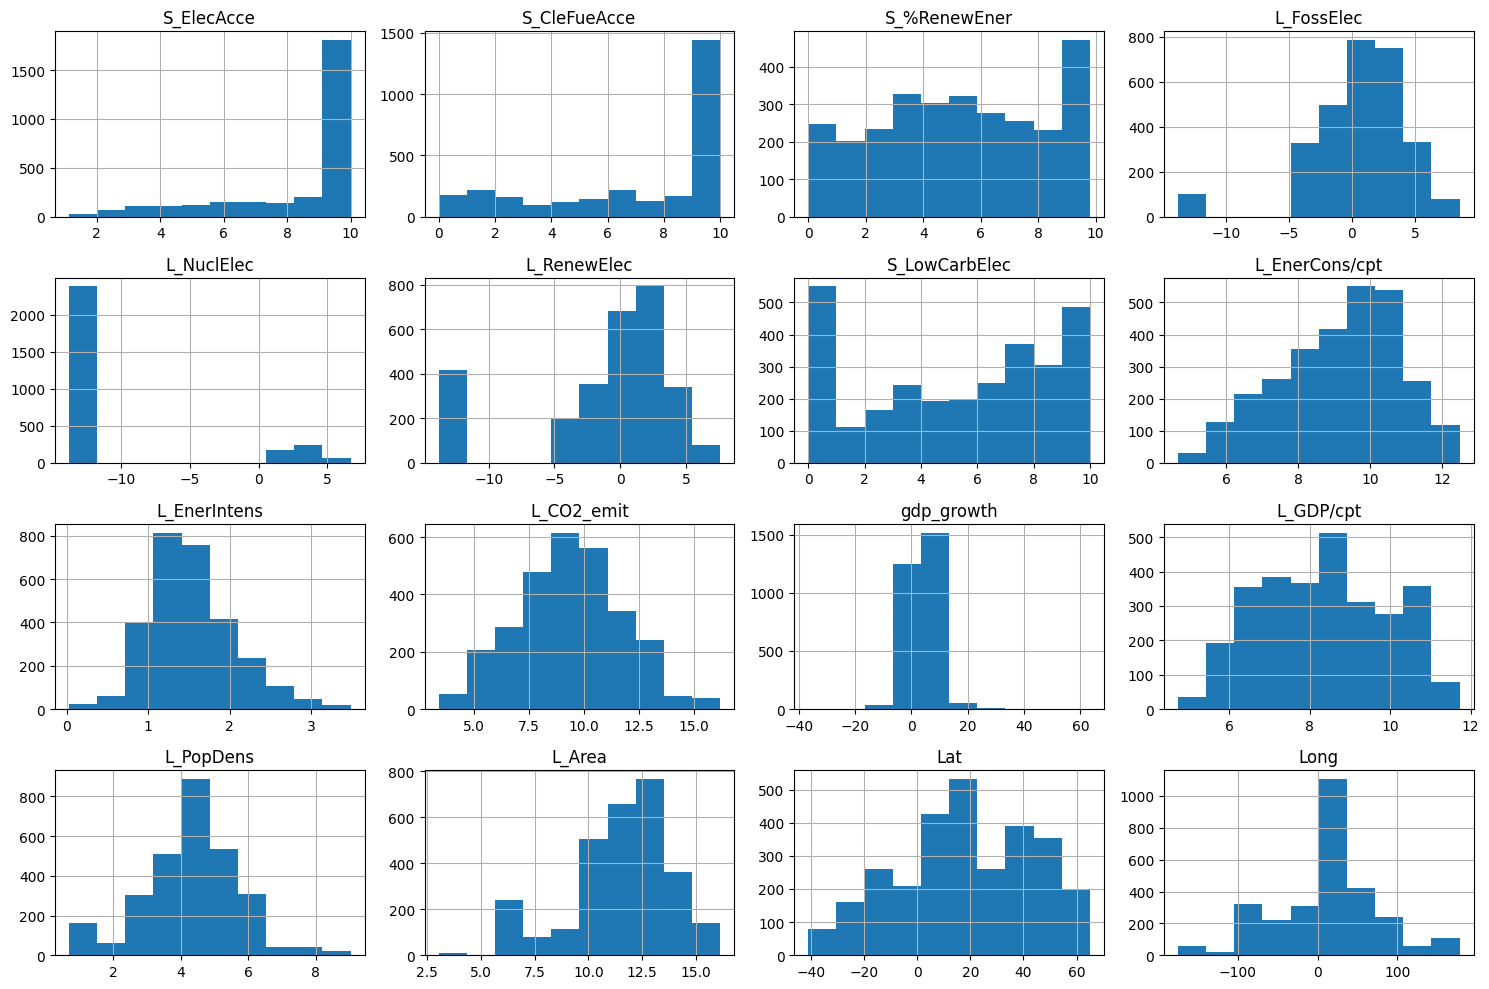

In [13]:
plt.figure(figsize = (15,10))
for i, col in enumerate(globDatTrans.select_dtypes(include='float64')):
    plt.subplot(4,4,i+1)
    globDatTrans[col].hist()
    plt.title(col[:39])
    
plt.tight_layout()
plt.show()

**Comment the data here:** ...

## 5) Visualize the great heterogeneity of CO2 emissions

Since we are going to predict the <em>LCO2_emit</em> using different methods later in this notebook, we would like to get better knowlege about the variable. First we are going to look at the heterogeneity of this varaible. Secondly we would like to look at the relation between the CO2-emission and the variable year, as this is quite relevant due of the climate awareness of today.

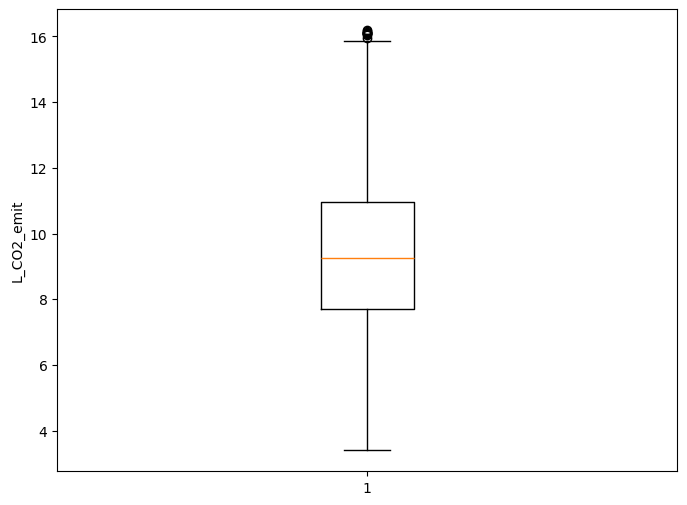

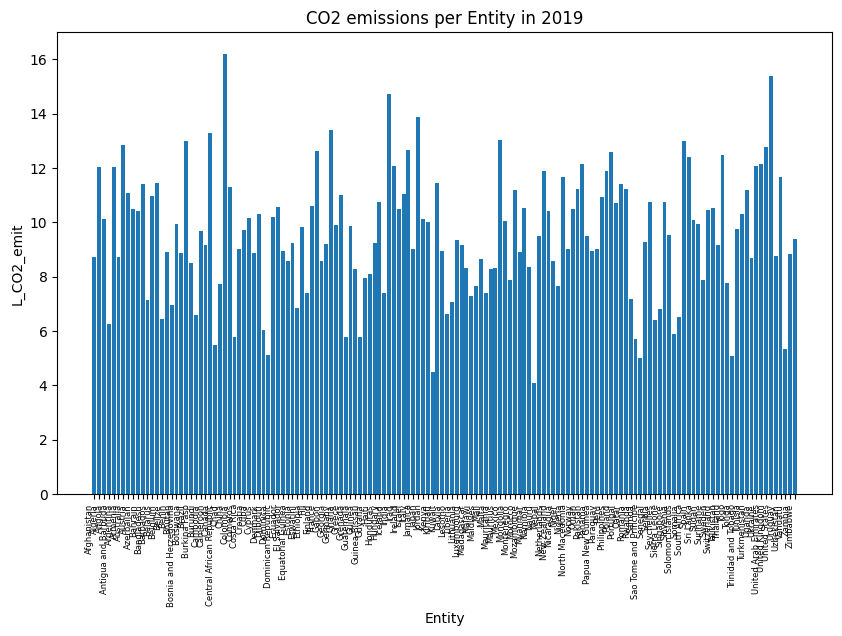

In [215]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(globDatTrans['L_CO2_emit'])
plt.ylabel('L_CO2_emit')
plt.show()

# Extracting relevant columns
CO2perEntity = globDatTrans[['Year','Entity', 'L_CO2_emit']]

# Filtering data for the year 2019
CO2perEntity2019 = globDatTrans[globDatTrans['Year'] == 2019][['Entity', 'L_CO2_emit']]

# Plotting bar chart
plt.figure(figsize=(10, 6))
plt.bar(CO2perEntity2019['Entity'], CO2perEntity2019['L_CO2_emit'])
plt.xlabel('Entity')
plt.ylabel('L_CO2_emit')
plt.title('CO2 emissions per Entity in 2019')
plt.xticks(rotation=90, ha='right', fontsize=6)
plt.show()


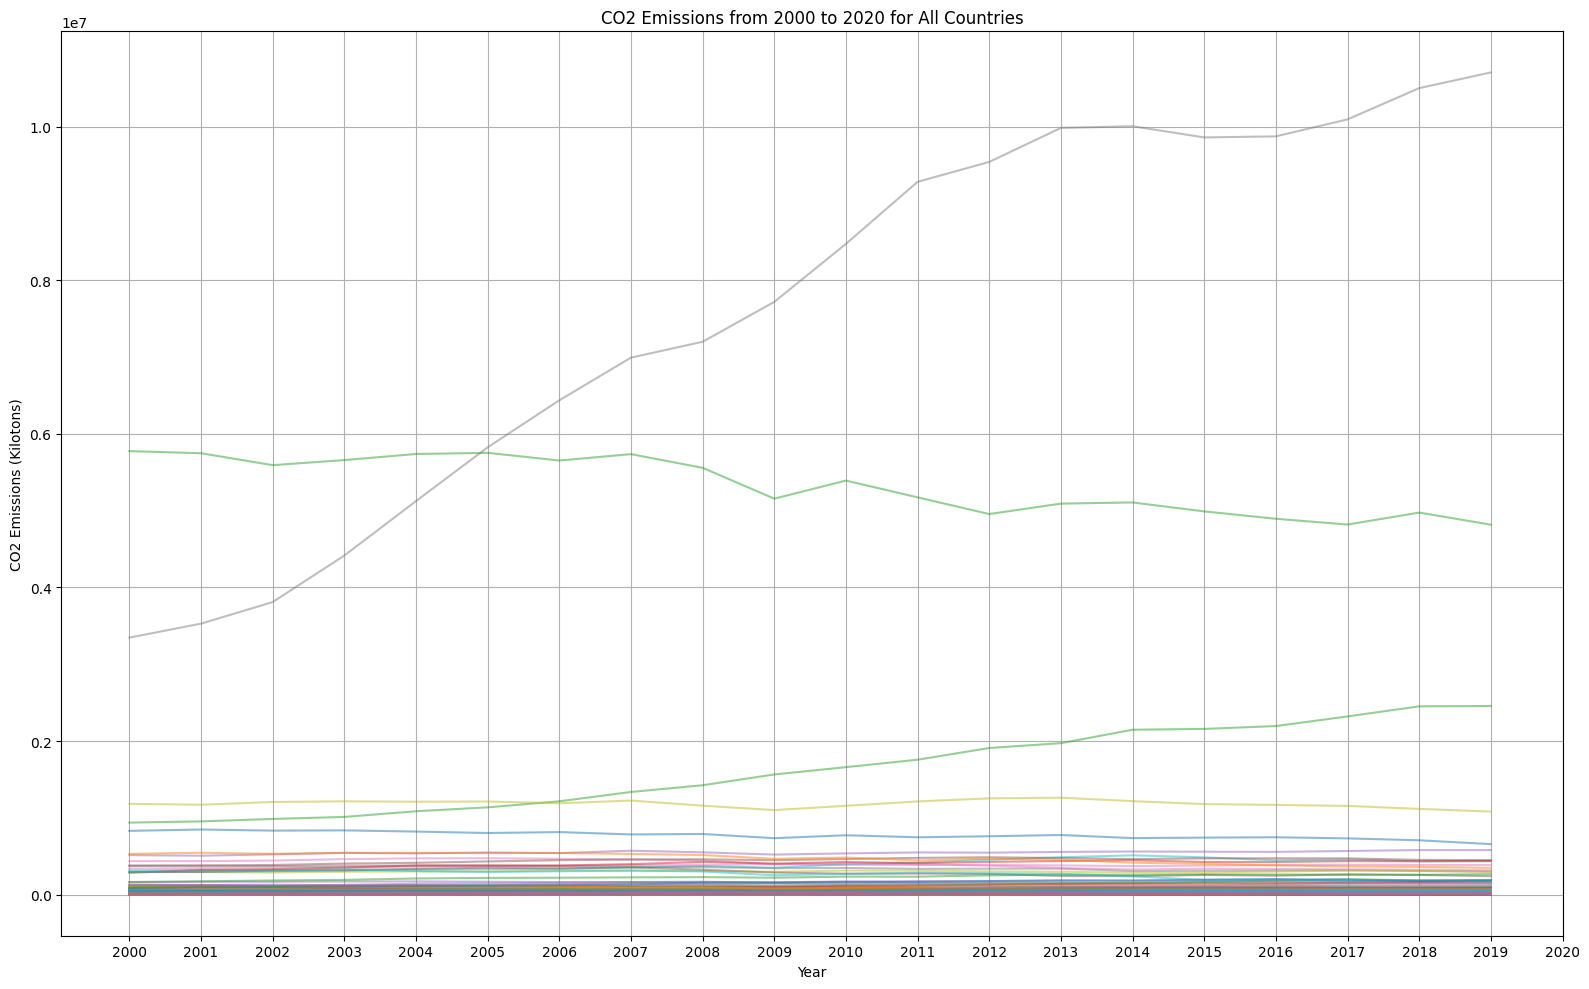

In [15]:
plt.figure(figsize=(16, 10))

for country in globDatFull['Entity'].unique():
    country_data = globDatFull[globDatFull['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Value_co2_emissions_kt_by_country'], linestyle='-', label=country, alpha=0.5)

plt.title('CO2 Emissions from 2000 to 2020 for All Countries')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (Kilotons)')
plt.xticks(range(2000, 2021, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

In this graph, top 5 countries by CO2 emissions have such large amount that we cannot see the trend, we simply remove them.

/var/folders/fp/j8_7xh5s5h535x1d0jnd66j80000gn/T/ipykernel_32555/982216590.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_co2_by_country = globDatFull.groupby('Entity')['Value_co2_emissions_kt_by_country'].sum().reset_index()


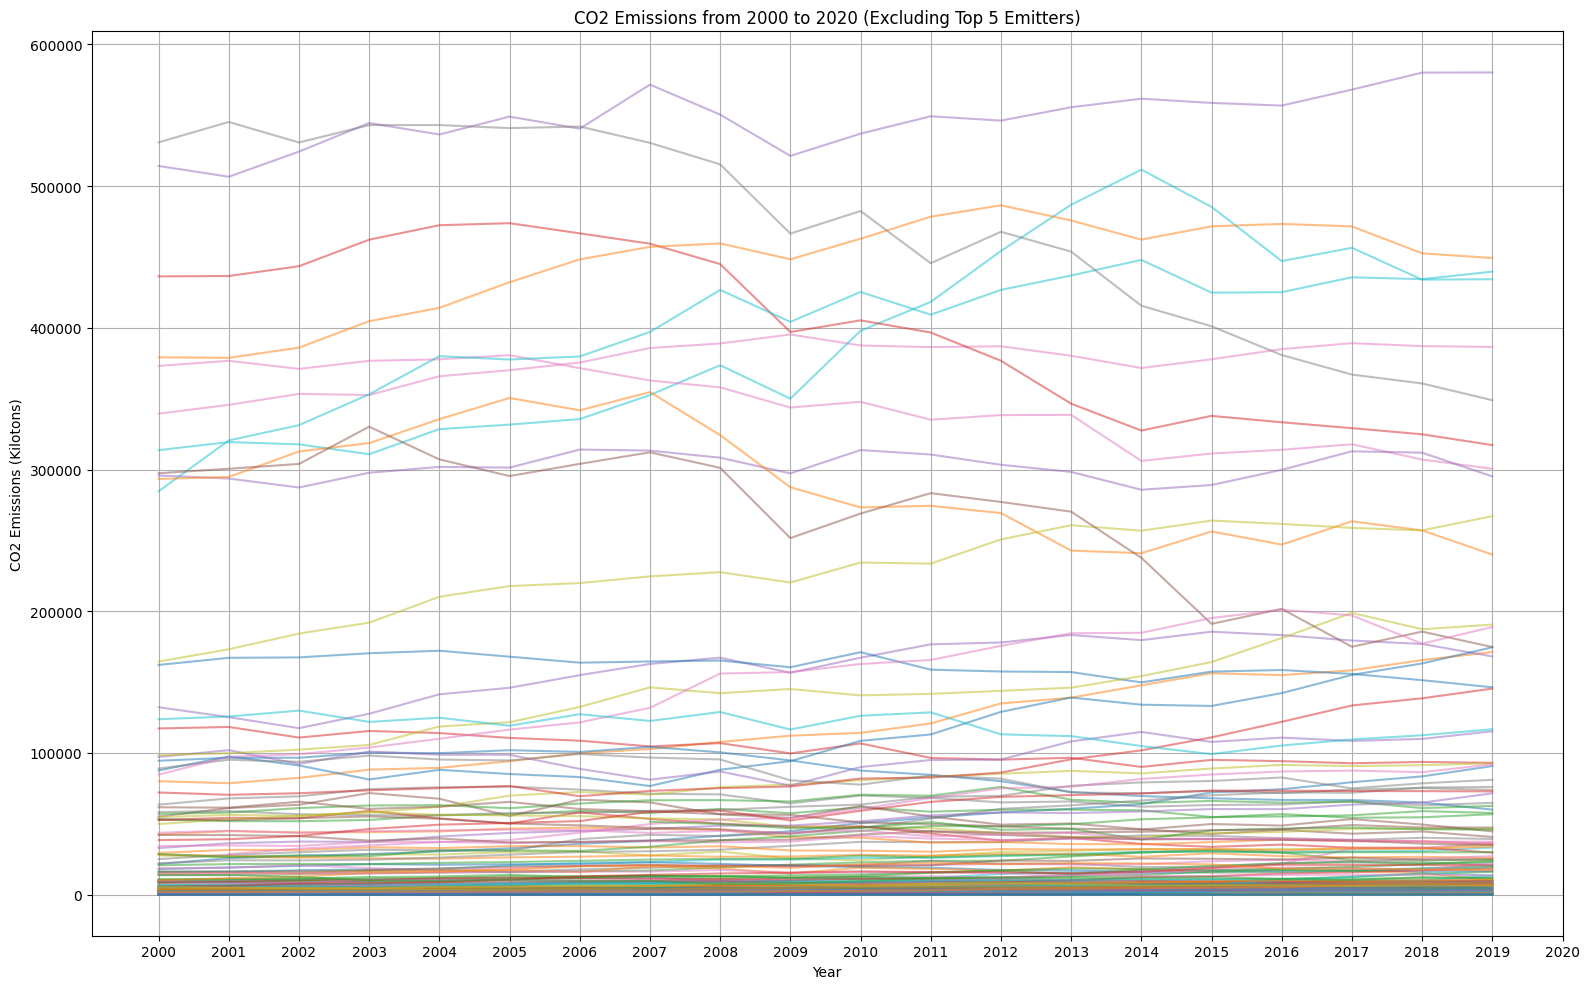

In [16]:
# Summing CO2 emissions for each country
total_co2_by_country = globDatFull.groupby('Entity')['Value_co2_emissions_kt_by_country'].sum().reset_index()

# Sorting to find the top 5 countries
top_5_emitters = total_co2_by_country.sort_values(by='Value_co2_emissions_kt_by_country', ascending=False).head(5)['Entity']

# Now, we'll remove these top 5 countries from the dataset and create a plot without them
data_without_top_5 = globDatFull[~globDatFull['Entity'].isin(top_5_emitters)]

# Plotting without the top 5 emitters
plt.figure(figsize=(16, 10))

for country in data_without_top_5['Entity'].unique():
    country_data = data_without_top_5[data_without_top_5['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Value_co2_emissions_kt_by_country'], linestyle='-', label=country, alpha=0.5)

plt.title('CO2 Emissions from 2000 to 2020 (Excluding Top 5 Emitters)')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (Kilotons)')
plt.xticks(range(2000, 2021, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
globDatFull
df2 = globDatFull.groupby('Entity')['Value_co2_emissions_kt_by_country'].sum()
df2.sort_values(ascending=False)[:5]


/var/folders/fp/j8_7xh5s5h535x1d0jnd66j80000gn/T/ipykernel_32555/1295850408.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2 = globDatFull.groupby('Entity')['Value_co2_emissions_kt_by_country'].sum()


Entity
China            1.527328e+08
United States    1.065908e+08
India            3.267958e+07
Japan            2.367469e+07
Germany          1.547289e+07
Name: Value_co2_emissions_kt_by_country, dtype: float64

In [19]:
CO2perEntity = CO2perEntity.sort_values(by=['Year', 'L_CO2_emit'], ascending=[True, False])
topFivePolutioner = CO2perEntity.groupby('Year').head(5)
print(topFivePolutioner.to_markdown())

|      |   Year | Entity        |   L_CO2_emit |
|-----:|-------:|:--------------|-------------:|
| 3502 |   2000 | United States |      15.5692 |
|  714 |   2000 | China         |      15.0234 |
| 1681 |   2000 | Japan         |      13.9832 |
| 1534 |   2000 | India         |      13.7514 |
| 1282 |   2000 | Germany       |      13.6295 |
| 3503 |   2001 | United States |      15.5644 |
|  715 |   2001 | China         |      15.0765 |
| 1682 |   2001 | Japan         |      13.9728 |
| 1535 |   2001 | India         |      13.7679 |
| 1283 |   2001 | Germany       |      13.6503 |
| 3504 |   2002 | United States |      15.537  |
|  716 |   2002 | China         |      15.1532 |
| 1683 |   2002 | Japan         |      14.0033 |
| 1536 |   2002 | India         |      13.8009 |
| 1284 |   2002 | Germany       |      13.6332 |
| 3505 |   2003 | United States |      15.5488 |
|  717 |   2003 | China         |      15.3007 |
| 1684 |   2003 | Japan         |      14.0102 |
| 1537 |   2003 | In

## 6) Multidimensional descriptive analysis

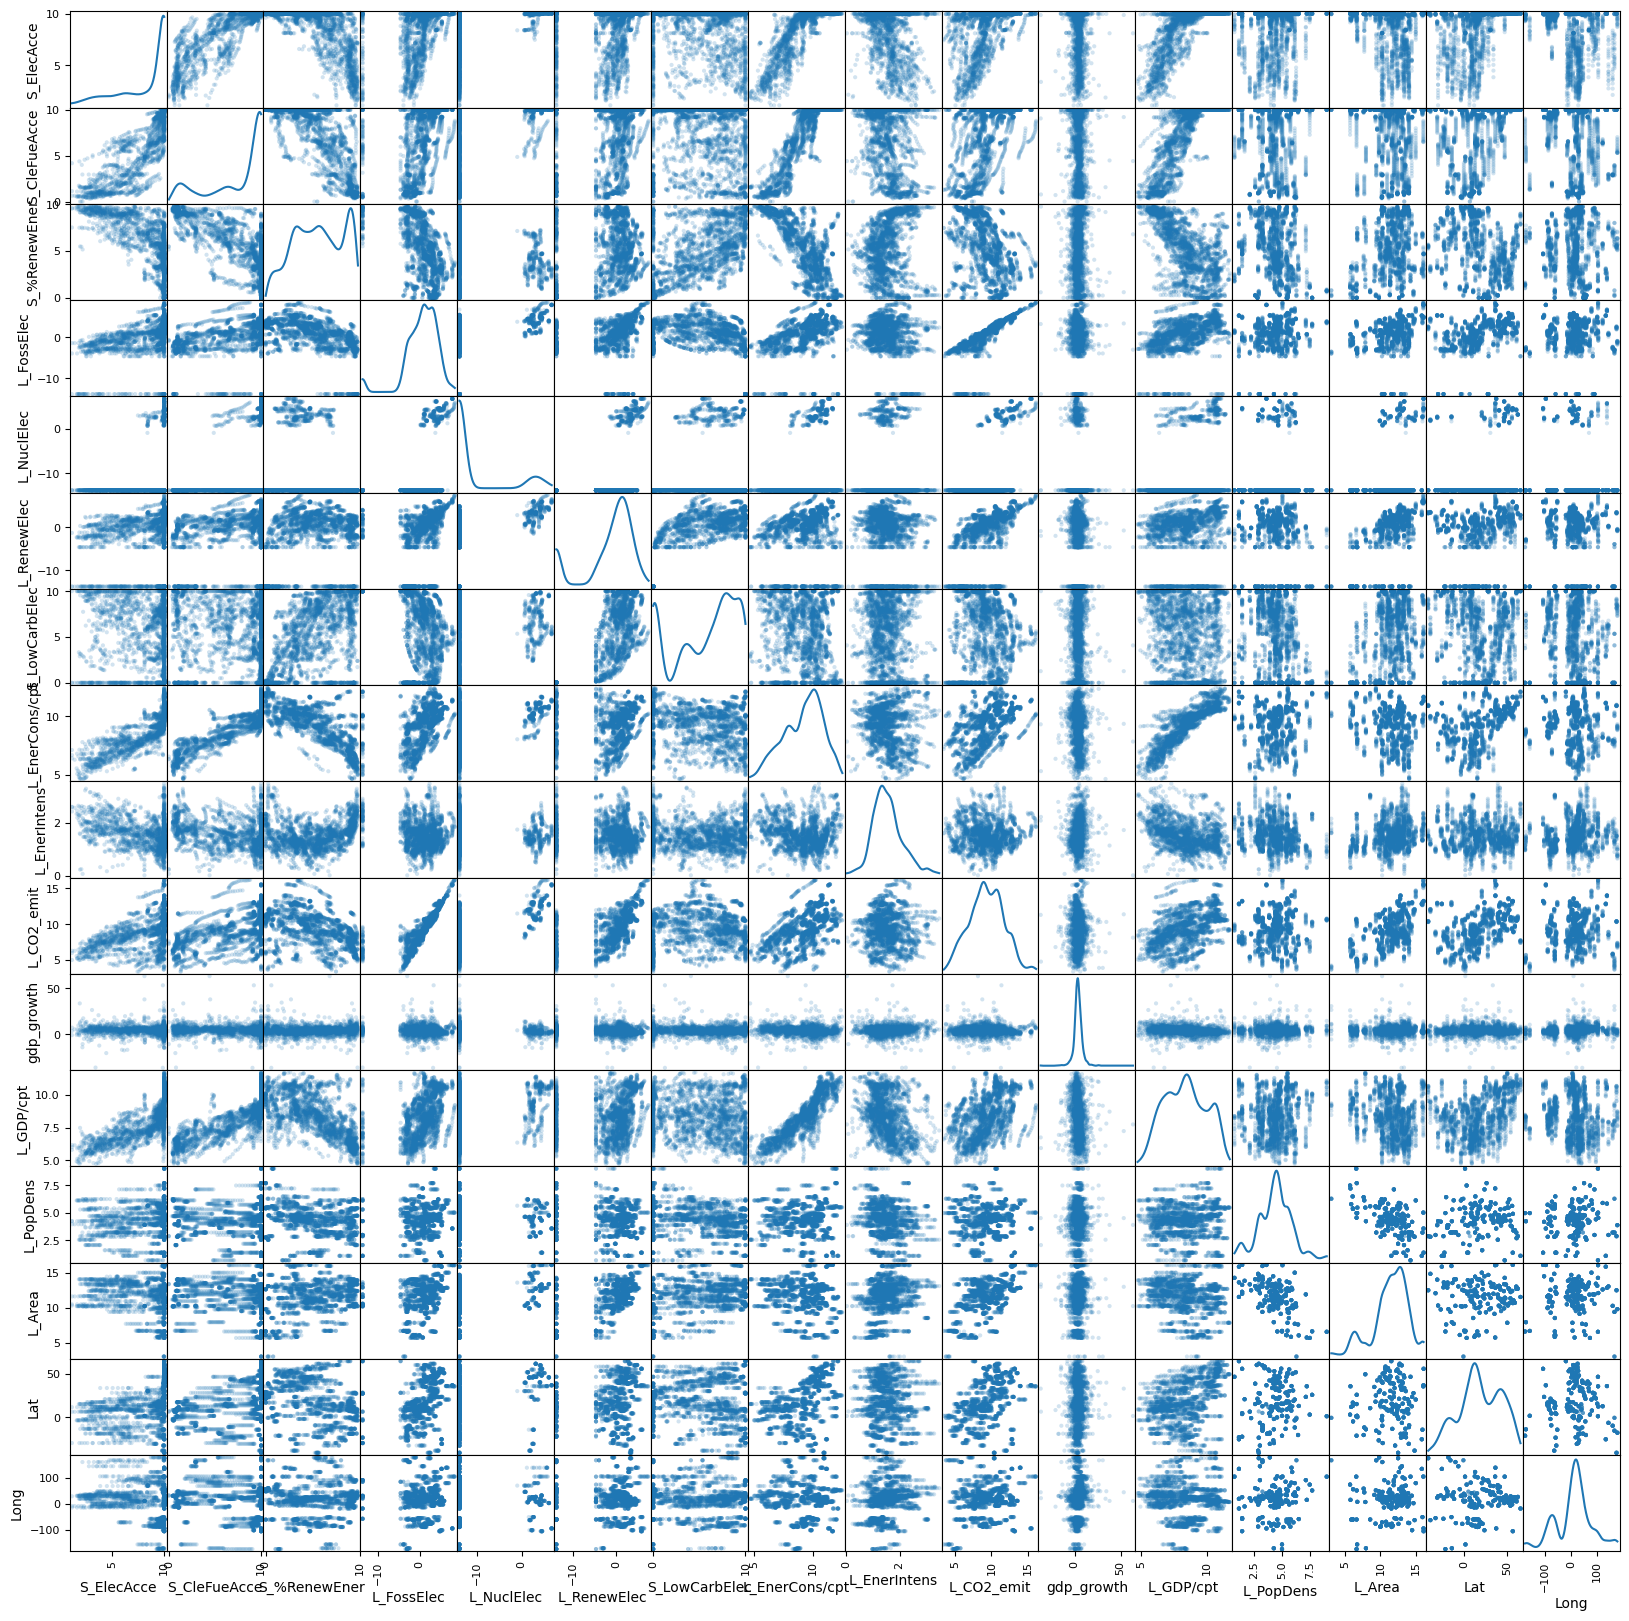

In [20]:
from pandas.plotting import scatter_matrix
scatter_matrix(globDatTrans.select_dtypes(include='float64'), alpha=0.2, 
               figsize=(20,20), diagonal='kde')
plt.show()

In [21]:
corr_matrix = globDatTrans.select_dtypes(include='float64').corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

We can see with this correlation graph that some variables are really well explained by some dimension. The first dimension is therefore really positively correlated with Access to Elec, Access to Clean Fuel, Energy Cons/cpt and GDP/cpt and negatively correlated with RenewEner. The second dimension is really positively correlated with L(Area) and RenewElec.

## 7) Principal component analysis

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

#variable reduction
X = scale(globDatTrans.select_dtypes(include='float64'))

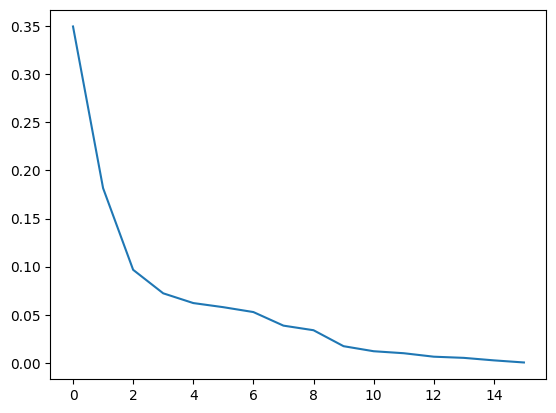

Total cumulative variance explained by the first i+1 dimensions:
[0.34963901 0.53127119 0.62800052 0.70030988 0.76248649 0.82036876
 0.87318957 0.91189775 0.94583908 0.96318275 0.97529091 0.98533004
 0.99175869 0.99697202 0.99958314 1.        ]


In [23]:
pca = PCA()
C = pca.fit(X).transform(X)
# Explain variance decomposition
plt.plot(pca.explained_variance_ratio_)
plt.show()
print("Total cumulative variance explained by the first i+1 dimensions:")
print(pca.explained_variance_ratio_.cumsum())

Two first components are responsible for over 50% variance. We perform ploting the first two principal components of each point, colored according to its value.

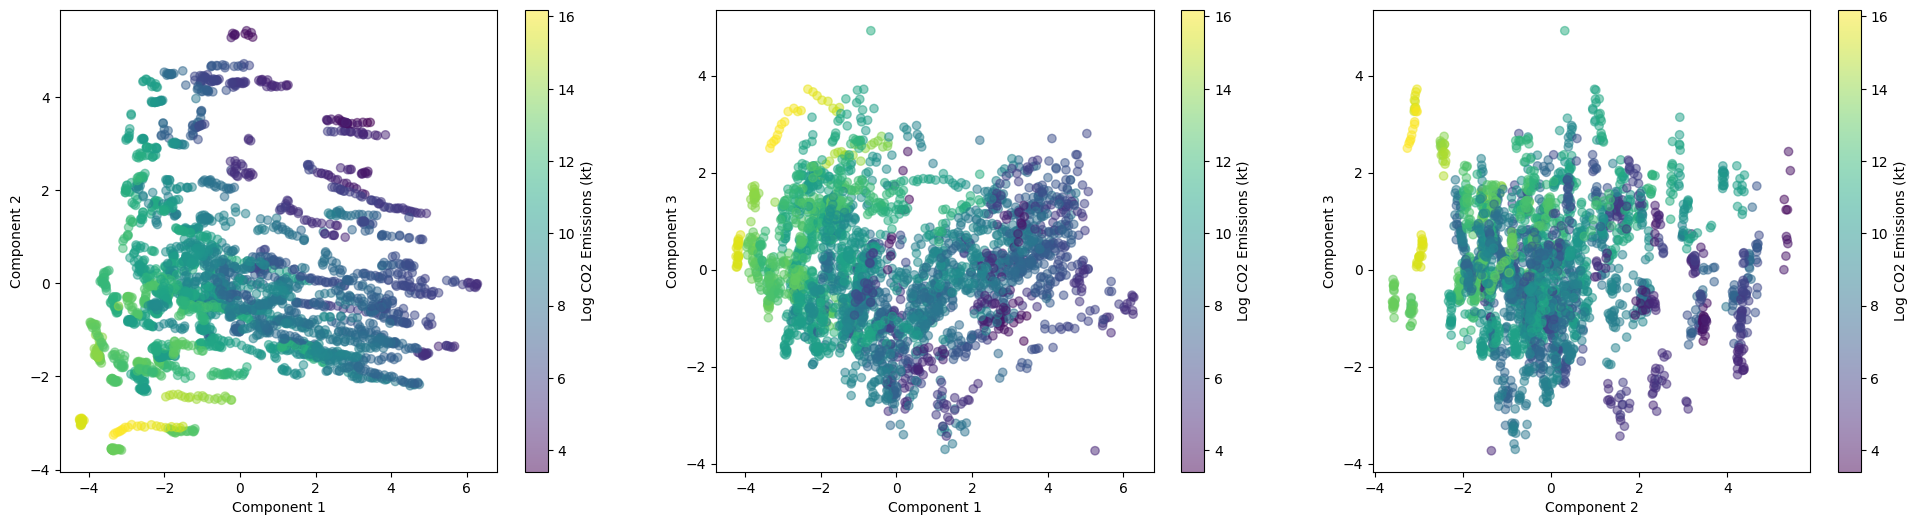

In [235]:
# %load solutions/scatter_digits.py
plt.figure(figsize = (24, 6))
plt.subplot(1,3,1)
scatter = plt.scatter(C[:, 0], C[:, 1], 
            c=globDatTrans["L_CO2_emit"],
            alpha = 0.5,
            cmap='viridis')
plt.colorbar(scatter, label='Log CO2 Emissions (kt)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.subplot(1,3,2)
scatter = plt.scatter(C[:, 0], C[:, 2], 
            c=globDatTrans["L_CO2_emit"],
            alpha = 0.5,
            cmap='viridis')
plt.colorbar(scatter, label='Log CO2 Emissions (kt)')
plt.xlabel('Component 1')
plt.ylabel('Component 3')

plt.subplot(1,3,3)
scatter = plt.scatter(C[:, 1], C[:, 2], 
            c=globDatTrans["L_CO2_emit"],
            alpha = 0.5,
            cmap='viridis')
plt.colorbar(scatter, label='Log CO2 Emissions (kt)')
plt.xlabel('Component 2')
plt.ylabel('Component 3')
plt.show()

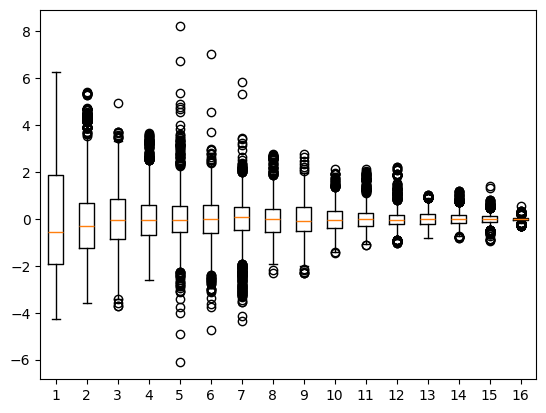

In [25]:
# Principle Component Distribution
plt.boxplot(C[:,0:20])
plt.show()

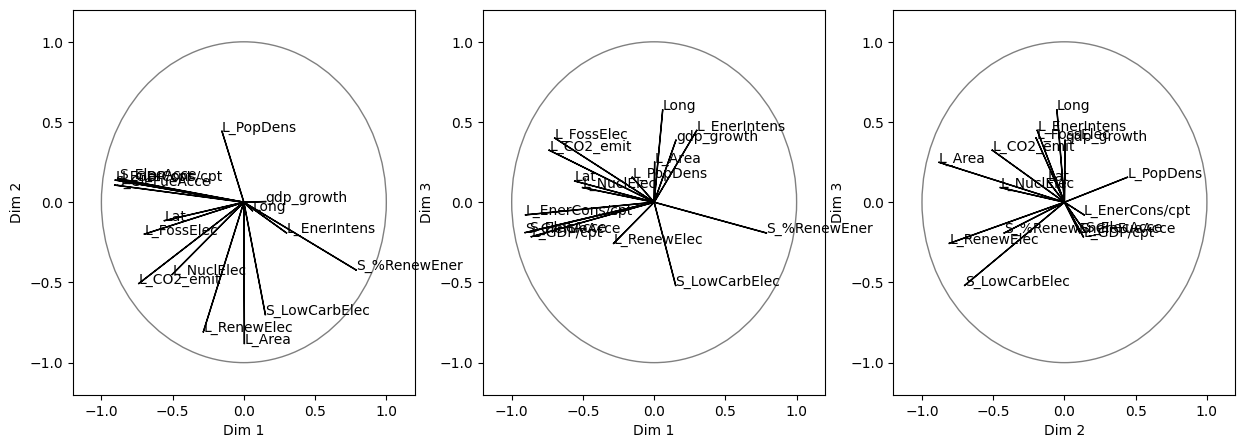

In [236]:
## coordinates and representation of variables
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
coord3=pca.components_[2]*np.sqrt(pca.explained_variance_[2])
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 3, 1)
for i, j, nom in zip(coord1,coord2, globDatTrans.select_dtypes(include='float64').columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
    plt.xlabel("Dim "+str(1))
    plt.ylabel("Dim "+str(2))
plt.axis((-1.2,1.2,-1.2,1.2))
# circle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)

ax = fig.add_subplot(1, 3, 2)
for i, j, nom in zip(coord1,coord3, globDatTrans.select_dtypes(include='float64').columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
    plt.xlabel("Dim "+str(1))
    plt.ylabel("Dim "+str(3))
plt.axis((-1.2,1.2,-1.2,1.2))
# circle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)

ax = fig.add_subplot(1, 3, 3)
for i, j, nom in zip(coord2,coord3, globDatTrans.select_dtypes(include='float64').columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
    plt.xlabel("Dim "+str(2))
    plt.ylabel("Dim "+str(3))
plt.axis((-1.2,1.2,-1.2,1.2))
# circle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

With those graph, we can see that the variable we want to predict is well represented by the two first (even three) dimensions. Nevertheless, even if some variable are really correlated with the pca components, we can see here that they are far from going in the same direction. We can deduce that we will not have a big reduction of dimension, as we saw before. We chose thus not to reduce the data for the rest of our project. 

## 8) Dependency between 'Year' and 'L(CO2_emit)'

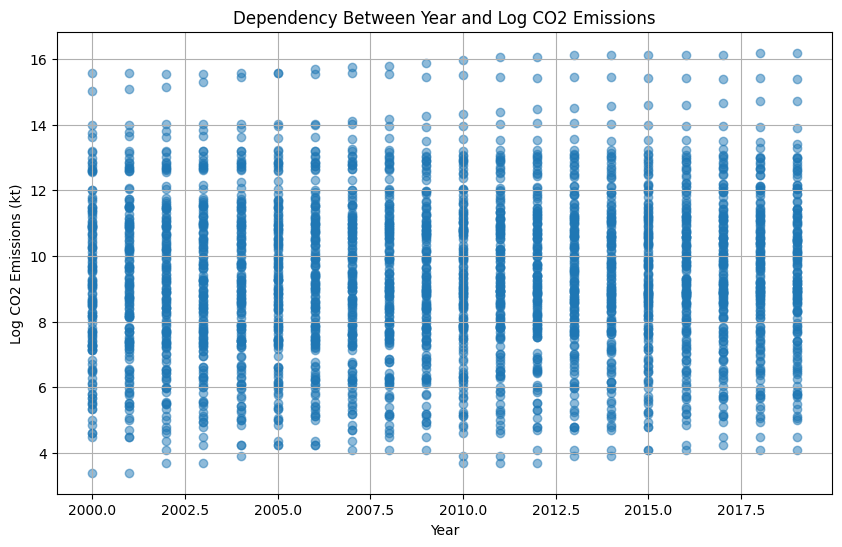

In [27]:
# Plotting the dependency between 'Year' and 'L(CO2_emit)'
plt.figure(figsize=(10, 6))
plt.scatter(globDatTrans['Year'], globDatTrans['L_CO2_emit'], alpha=0.5)
plt.title('Dependency Between Year and Log CO2 Emissions')
plt.xlabel('Year')
plt.ylabel('Log CO2 Emissions (kt)')
plt.grid(True)
plt.show()

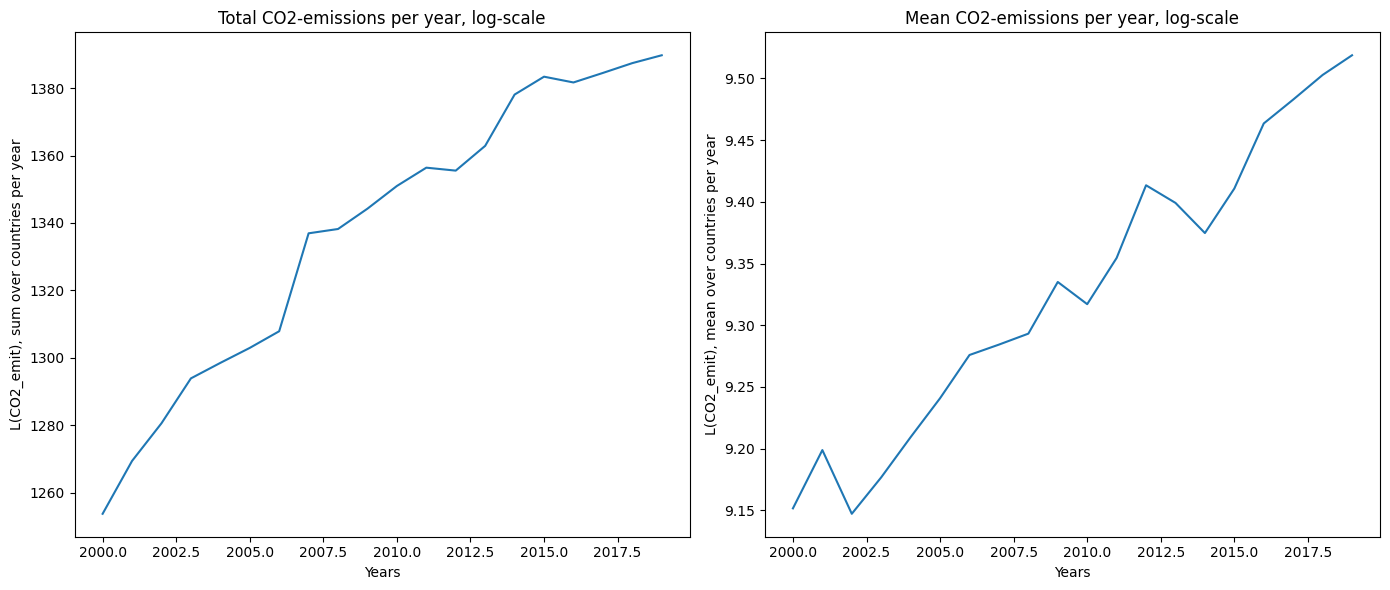

In [217]:
# Aggregate the data by Year to get sum and mean of LCO2_emit
CO2vsYearSum = globDatTrans.groupby('Year')['L_CO2_emit'].sum().reset_index()
CO2vsYearMean = globDatTrans.groupby('Year')['L_CO2_emit'].mean().reset_index()

# Plot total CO2-emissions per year, log-scale
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=CO2vsYearSum, x='Year', y='L_CO2_emit')
plt.xlabel('Years')
plt.ylabel('L(CO2_emit), sum over countries per year')
plt.title('Total CO2-emissions per year, log-scale')

# Plot mean CO2-emissions per year, log-scale
plt.subplot(1, 2, 2)
sns.lineplot(data=CO2vsYearMean, x='Year', y='L_CO2_emit')
plt.xlabel('Years')
plt.ylabel('L(CO2_emit), mean over countries per year')
plt.title('Mean CO2-emissions per year, log-scale')

plt.tight_layout()
plt.show()

Both the total and mean log-scale of the CO2-emissions increase evidently as a function of the variable <em>Year</em>. This in itself is not enough evidence to confirm that the CO2-emissions has increased globally during the years, because, we do not now if all countries has registered their emissions each year. It is belivable that there are more registrations in the later years, as there have become more awareness regarding the climate lately. 

In [224]:
year_counts = globDatTrans.groupby('Year').size().reset_index(name='Number of Values')
year_counts = year_counts.sort_values(by='Year', ascending=True)
print(year_counts)

    Year  Number of Values
0   2000               137
1   2001               138
2   2002               140
3   2003               141
4   2004               141
5   2005               141
6   2006               141
7   2007               144
8   2008               144
9   2009               144
10  2010               145
11  2011               145
12  2012               144
13  2013               145
14  2014               147
15  2015               147
16  2016               146
17  2017               146
18  2018               146
19  2019               146


We see that the number of total registrations for each year varies with $10$, indicating that the effect of missing entries should not have a too large effect on the increase of CO2-emissions. Still, we do not now which countries having missing entries or if those are among the most emitting countries, except from the five highest emitters, as we saw that it was the same five for each year. To check wherever the ratio of registered values have an effect on the increase in CO2-emissions, we removed all countries which have missing values for the variable <em>LCO2_emit</em>.

In [231]:
entity_counts = globDatTrans.groupby('Entity').size().reset_index(name='Number of years')
entity_counts = entity_counts[entity_counts['Number of years'] == 20]['Entity']
globDatFullYear = globDatTrans[globDatTrans['Entity'].isin(entity_counts)]
globDatFullYear


/var/folders/fp/j8_7xh5s5h535x1d0jnd66j80000gn/T/ipykernel_32555/934848426.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  entity_counts = globDatTrans.groupby('Entity').size().reset_index(name='Number of years')


Entity  Year  S_ElecAcce  S_CleFueAcce  S_%RenewEner  L_FossElec  \
42     Algeria  2000    9.948523      9.853933      0.655744    3.171365   
43     Algeria  2001    9.948209      9.864076      0.655744    3.217275   
44     Algeria  2002    9.947515      9.889388      0.714143    3.255786   
45     Algeria  2003    9.946558      9.899495      0.685565    3.315640   
46     Algeria  2004    9.945455      9.909591      0.663325    3.372112   
...        ...   ...         ...           ...           ...         ...   
3643  Zimbabwe  2015    5.805170      5.431390      8.989994    1.391282   
3644  Zimbabwe  2016    6.523935      5.458938      9.049862    1.252763   
3645  Zimbabwe  2017    6.646701      5.458938      9.080749    1.115142   
3646  Zimbabwe  2018    6.750752      5.468089      8.957120    1.316409   
3647  Zimbabwe  2019    6.839698      5.486347      9.027735    1.297463   

      L_NuclElec  L_RenewElec  S_LowCarbElec  L_EnerCons/cpt  L_EnerIntens  \
42    -13.815511    -2.995712       0.457485        9.184666      1.430311   
43    -13.815511    -2.659246       0.528833        9.206497      1.403643   
44    -13.815511    -2.813394       0.480384        9.228215      1.415853   
45    -13.815511    -1.347070       0.967084        9.260126      1.406097   
46    -13.815511    -1.386290       0.922296        9.283500      1.376244   
...          ...          ...            ...             ...           ...   
3643  -13.815511     1.680828       7.562308        8.258661      2.337952   
3644  -13.815511     1.199965       6.977130        8.079519      2.302585   
3645  -13.815511     1.458615       7.648752        8.028785      2.252344   
3646  -13.815511     1.697449       7.707944        8.143804      2.285439   
3647  -13.815511     1.521699       7.455369        8.007585      2.348514   

      L_CO2_emit  gdp_growth  L_GDP/cpt  L_PopDens     L_Area        Lat  \
42     11.290407    3.800000   7.475921   2.890372  14.683342  28.033886   
43     11.272763    3.000000   7.461989   2.890372  14.683342  28.033886   
44     11.319341    5.600000   7.485396   2.890372  14.683342  28.033886   
45     11.387249    7.200000   7.651301   2.890372  14.683342  28.033886   
46     11.401882    4.300000   7.867177   2.890372  14.683342  28.033886   
...          ...         ...        ...        ...        ...        ...   
3643    9.427868    1.779873   7.275913   3.637586  12.875841 -19.015438   
3644    9.307467    0.755869   7.289330   3.637586  12.875841 -19.015438   
3645    9.243775    4.709492   7.118979   3.637586  12.875841 -19.015438   
3646    9.423838    4.824211   7.134606   3.637586  12.875841 -19.015438   
3647    9.372459   -6.144236   7.182915   3.637586  12.875841 -19.015438   

           Long  
42     1.659626  
43     1.659626  
44     1.659626  
45     1.659626  
46     1.659626  
...         ...  
3643  29.154857  
3644  29.154857  
3645  29.154857  
3646  29.154857  
3647  29.154857  

[2720 rows x 18 columns]

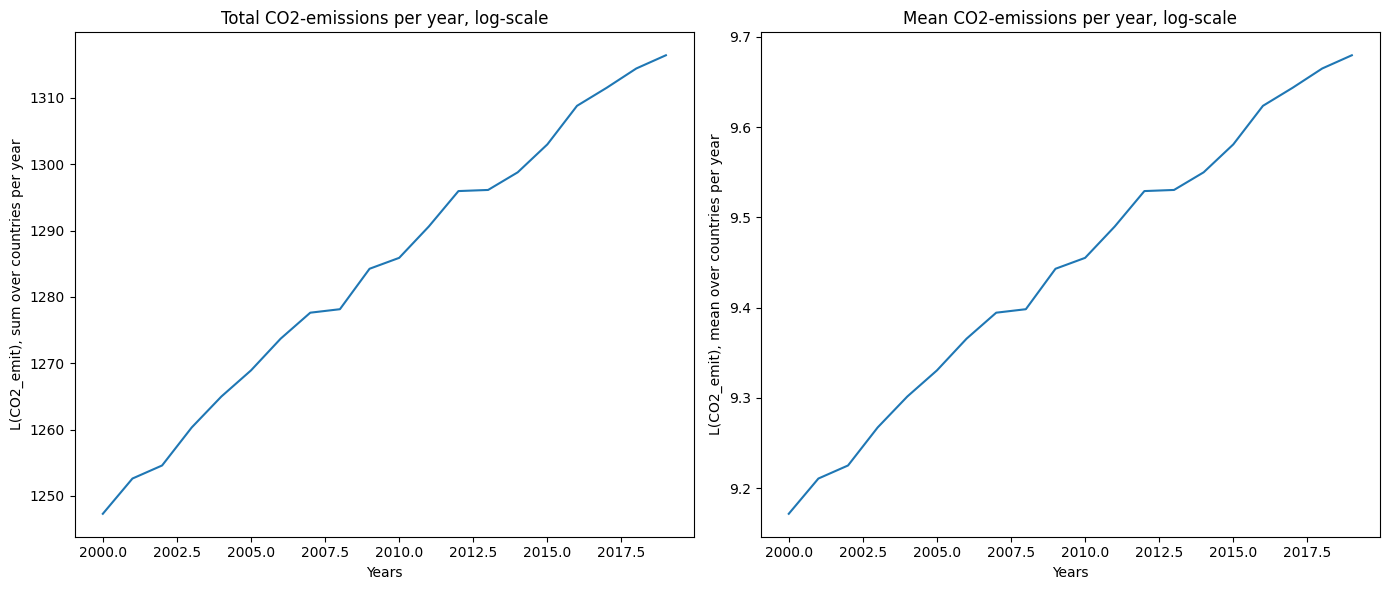

In [232]:
# Aggregate the data by Year to get sum and mean of LCO2_emit
CO2vsYearSum = globDatFullYear.groupby('Year')['L_CO2_emit'].sum().reset_index()
CO2vsYearMean = globDatFullYear.groupby('Year')['L_CO2_emit'].mean().reset_index()

# Plot total CO2-emissions per year, log-scale
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=CO2vsYearSum, x='Year', y='L_CO2_emit')
plt.xlabel('Years')
plt.ylabel('L(CO2_emit), sum over countries per year')
plt.title('Total CO2-emissions per year, log-scale')

# Plot mean CO2-emissions per year, log-scale
plt.subplot(1, 2, 2)
sns.lineplot(data=CO2vsYearMean, x='Year', y='L_CO2_emit')
plt.xlabel('Years')
plt.ylabel('L(CO2_emit), mean over countries per year')
plt.title('Mean CO2-emissions per year, log-scale')

plt.tight_layout()
plt.show()

Without the missing values, the emissions of CO2 per year seems to be an affine function.

# II) Modelisation

## 1) Data division

We are now aiming to predict the value for CO2 emission, then we drop the column of L_CO2_emit. Moreover, the result from I.6 to select **'L(FossElec)'** (0.783272) is the variable with highest correlation with L_CO2_emit, so it is suggested that we also drop this column to challenge the model

In [28]:
dfX = globDatTrans.select_dtypes(include='float64').drop(columns = ['L_CO2_emit', 'L_FossElec'])
Y = globDatTrans['L_CO2_emit']
dfX.head()

S_ElecAcce  S_CleFueAcce  S_%RenewEner  L_NuclElec  L_RenewElec  \
3    3.839076      3.082207      6.054750  -13.815511    -0.462034   
4    4.479394      3.301515      6.651316  -13.815511    -0.579817   
5    5.038938      3.492850      5.820653  -13.815511    -0.527631   
6    5.542444      3.721559      5.647123  -13.815511    -0.446286   
7    6.004249      3.911521      5.364699  -13.815511    -0.287681   

   S_LowCarbElec  L_EnerCons/cpt  L_EnerIntens  gdp_growth  L_GDP/cpt  \
3       8.186653        5.437941      0.336472    8.832278   5.250617   
4       7.932298        5.319253      0.182322    1.414118   5.353667   
5       7.964977        5.529703      0.343590   11.229715   5.489067   
6       8.728716        5.718411      0.405465    5.357403   5.574940   
7       8.885233        5.870087      0.425268   13.826320   5.885251   

   L_PopDens     L_Area       Lat       Long  
3   4.094345  13.388153  33.93911  67.709953  
4   4.094345  13.388153  33.93911  67.709953  
5   4.094345  13.388153  33.93911  67.709953  
6   4.094345  13.388153  33.93911  67.709953  
7   4.094345  13.388153  33.93911  67.709953

In [29]:
from sklearn.model_selection import train_test_split  
X_train,X_test,Y_train,Y_test=train_test_split(dfX,Y,test_size=0.2,random_state=11)

## 2) Methods of ML

### Linear regression

With variable selection, we use the result from I.6 to select **'L_NuclElec'** (0.571442) is the variable with highest correlation with 'L(CO2_emit)'

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Fit linear regression model
linear_sel = make_pipeline(StandardScaler(), linear_model.LinearRegression())
linear_sel.fit(X_train[['L_NuclElec']], Y_train)

# Predict on the testing set
y_pred = linear_sel.predict(X_test[['L_NuclElec']])

# Calculate the mean squared error
mse = mean_squared_error(Y_test, y_pred)

# Model coefficients
# intercept = linear_sel.intercept_
# slope = linear_sel.coef_[0]

# intercept, slope, 
mse

3.6974286658249294

We use multivariable linear regression for linear regression without selection:

In [32]:
# Fit linear regression model
linear_nosel = make_pipeline(StandardScaler(), linear_model.LinearRegression())
linear_nosel.fit(X_train, Y_train)

# Predict on the testing set
y_pred = linear_nosel.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(Y_test, y_pred)

# Model coefficients
# intercept = linear_nosel.intercept_
# slope = linear_nosel.coef_[0]

# intercept, slope, 
mse

0.09905862674313286

In [33]:
#Plot the graph 

In [34]:
from sklearn.linear_model import Lasso

# Fit Lasso regression model
lasso_model = Lasso(alpha=0.00001)  # alpha is the regularization strength
lasso_model.fit(X_train, Y_train)

# Predict on the testing set
y_pred_lasso = lasso_model.predict(X_test)

# Calculate the mean squared error
mse_lasso = mean_squared_error(Y_test, y_pred_lasso)

# Model coefficients
intercept_lasso = lasso_model.intercept_
slope_lasso = lasso_model.coef_[0]

print("Lasso Regression:")
print("Intercept:", intercept_lasso)
print("Slope:", slope_lasso)
print("MSE:", mse_lasso)


Lasso Regression:
Intercept: -12.273556004311738
Slope: 0.1337204790468223
MSE: 0.09905787337090993


In [35]:
from sklearn.linear_model import Lasso

# Fit Lasso regression model
lasso_model = Lasso(alpha=0.000001)  # alpha is the regularization strength
lasso_model.fit(X_train[['L_NuclElec']], Y_train)

# Predict on the testing set
y_pred_lasso = lasso_model.predict(X_test[['L_NuclElec']])

# Calculate the mean squared error
mse_lasso = mean_squared_error(Y_test, y_pred_lasso)

# Model coefficients
intercept_lasso = lasso_model.intercept_
slope_lasso = lasso_model.coef_[0]

print("Lasso Regression:")
print("Intercept:", intercept_lasso)
print("Slope:", slope_lasso)
print("MSE:", mse_lasso)


Lasso Regression:
Intercept: 11.60107316276604
Slope: 0.21160756992883856
MSE: 3.6974286535925005


I am establishing a function to determine the optimal set of hyperparameters that yield the highest recall for the model. This approach ensures a reusable framework for hyperparameter tuning of subsequent models:

### Scale dataset

In [37]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, KFold

In [38]:
scaled_X_train = StandardScaler().fit_transform(X_train)
scaled_X_test = StandardScaler().fit_transform(X_test)

### Support Vector Regression

### Identify kernel

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR

In [52]:
#Fitting the model on SVR with RBF kernel
svr_rbf = SVR()
svr_rbf.fit(scaled_X_train,Y_train)
pred_svr_rbf = svr_rbf.predict(scaled_X_test)
print("MSE: ", mean_squared_error(Y_test, pred_svr_rbf))

print(svr_rbf.get_params())
print("Number of support vectors: ", len(svr_rbf.support_vectors_))


MSE:  0.07273031040438815
{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Number of support vectors:  1095


In [53]:
#Fitting the model on SVR with linear kernel
svr_linear = SVR(kernel = 'linear')
svr_linear.fit(scaled_X_train,Y_train)
pred_svr_linear = svr_linear.predict(scaled_X_test)
print("MSE: ", mean_squared_error(Y_test, pred_svr_linear))

print(svr_linear.get_params())
print("Number of support vectors: ", len(svr_linear.support_vectors_))

MSE:  0.11657519680761674
{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Number of support vectors:  1534


In [50]:
#Fitting the model on SVR with polynomial kernel
svr_poly = SVR(kernel = 'poly')
svr_poly.fit(scaled_X_train,Y_train)
pred_svr_poly = svr_poly.predict(scaled_X_test)
print("MSE: ", mean_squared_error(Y_test, pred_svr_poly))

print(svr_poly.get_params())
print("Number of support vectors: ", len(svr_poly.support_vectors_))

MSE:  0.23217465368650872
{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Number of support vectors:  1621


In [56]:
#Fitting the model on SVC with sigmoid kernel
svr_sigmoid = SVR(kernel = 'sigmoid')
svr_sigmoid.fit(scaled_X_train,Y_train)
pred_svr_sigmoid = svr_sigmoid.predict(scaled_X_test)
print("MSE: ", mean_squared_error(Y_test, pred_svr_sigmoid))

print(svr_sigmoid.get_params())
print("Number of support vectors: ", len(svr_sigmoid.support_vectors_))

MSE:  317.09699816738595
{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Number of support vectors:  2289


From the base outputs above, we have the following observations:

**Polynomial kernel**
This is too expensive due to high number of support vectors. Also we have to tune three paramers: cost, gamma, coef0, as well the degree. We therefore choose to not use the polynomial kernel.

**Sigmoidal kernel**: The sigmoidal kernel is too specific, as it assumes a sigmoidal relation between the variables. It also requires a large number of support vectors, though this may be lowered using tuning.

**Linear kernel**: This has the lowest number of SVMs. We also know that the relationship between year and LCO2_emit is almost linear. What speaks against this method is that it is unsuitable for catch comlex tendancies in the dataset, if present. We still test this kernel.

**Radial/Gaussian kernel**:
This is the default kernel as it is performing relatively well in a wide range of situations. In our case it is also the kernel with initially the next-lowest number of SVMs. We test this kernel as well.

In [45]:
#Hyperparamter tuning using Gridsearch
svr_tune = SVR()
# param_grid = {'C':[0.01,0.05,0.1,1,10, 100, 1000],'kernel':['linear','rbf'], 'gamma':['scale','auto'] }
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}
grid = GridSearchCV(svr_tune,param_grid)
#Fitting the model
grid.fit(scaled_X_train,Y_train)
#Calculating the accuracy of tuned model
grid_svr = grid.predict(scaled_X_test)



In [57]:
print(grid.best_params_)
print(grid.best_estimator_.get_params())
print("MSE: ", mean_squared_error(Y_test, grid_svr))

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
{'C': 1000, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
MSE:  0.042124555841212254


We got the optimal hyperparameters of cost = 1000, gamma = 0.01 with RBF kernel. The MSE is now 4.2, which is 3% better than the default parameters

### Optimal Regression Tree

In [108]:
from sklearn import tree
RegTree = make_pipeline(StandardScaler(), tree.DecisionTreeRegressor())
RegTree.fit(X_train, Y_train)
# Predict on the testing set
y_pred_RegTr = RegTree.predict(X_test)
# Calculate MSE
mse_RegTr = mean_squared_error(Y_test, y_pred_RegTr)
# print MSE
print(RegTree.named_steps['decisiontreeregressor'].get_params())
print("MSE: ", mse_RegTr)

{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}
MSE:  0.06812966312187387


This return a fairly good score for the method, we are then tuning some parameters:

**max_depth**

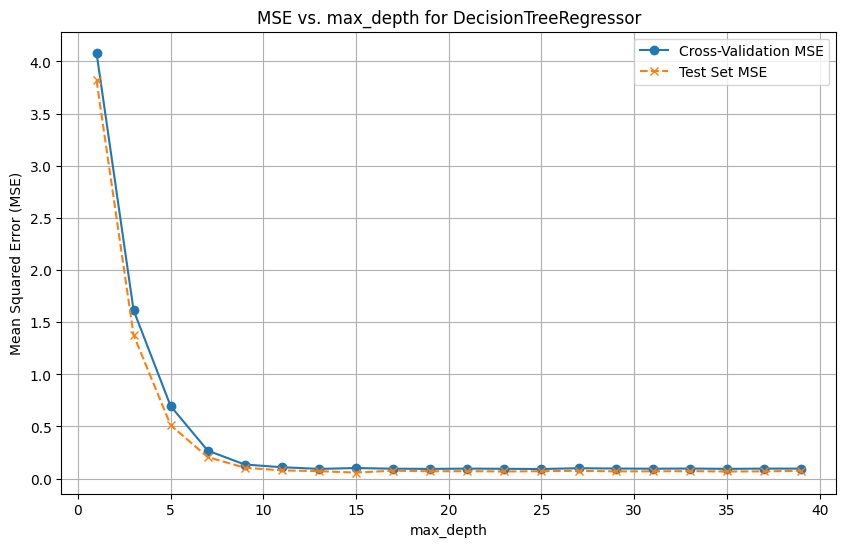

MSE on the test set:  0.07348991618932584
Best parameters:  {'max_depth': 25}


In [132]:


# Define the parameter grid with corrected range for max_depth
param_grid = {"max_depth": list(range(1, 41, 2))}

# Initialize GridSearchCV with DecisionTreeRegressor
tree_model = tree.DecisionTreeRegressor()
tree_tune = GridSearchCV(tree_model, param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the model
tree_tune.fit(X_train, Y_train)

# Extract the results
results = tree_tune.cv_results_

# Get the mean test scores (neg_mean_squared_error) and convert to positive MSE
mean_test_scores = -results['mean_test_score']
param_values = results['param_max_depth']

# Calculate MSE for test set for each max_depth
test_mse_scores = []
for depth in param_grid["max_depth"]:
    model = tree.DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, y_pred)
    test_mse_scores.append(mse)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(param_values, mean_test_scores, marker='o', label='Cross-Validation MSE')
plt.plot(param_values, test_mse_scores, marker='x', linestyle='--', label='Test Set MSE')
plt.xlabel('max_depth')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. max_depth for DecisionTreeRegressor')
plt.legend()
plt.grid(True)
plt.show()

# Predict on the test data using the best model
y_pred_RegTr_tuned = tree_tune.best_estimator_.predict(X_test)

# Calculate Mean Squared Error on the test set
mse = mean_squared_error(Y_test, y_pred_RegTr_tuned)
print("MSE on the test set: ", mse)
print("Best parameters: ", tree_tune.best_params_)


**min_samples_leaf**

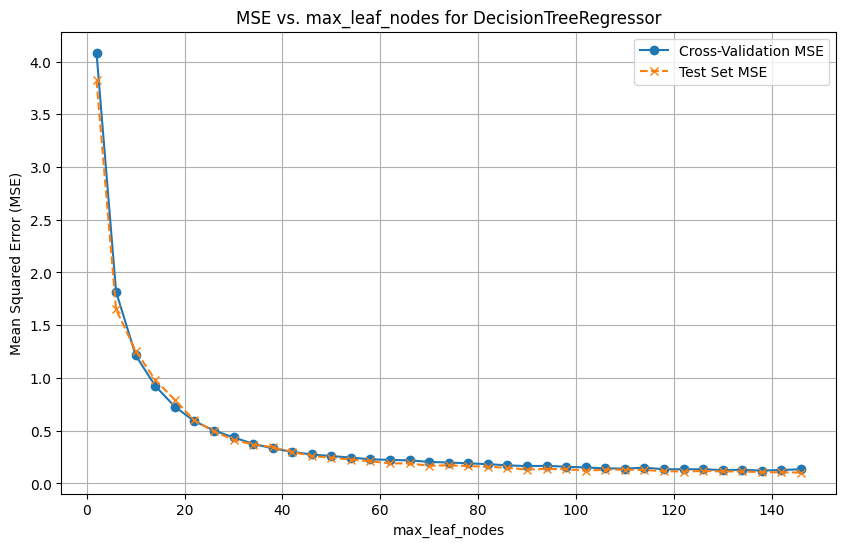

MSE on the test set:  0.10703455873093305
Best parameters:  {'max_leaf_nodes': 138}


In [137]:


# Define the parameter grid with corrected range for max_leaf_nodes
param_grid = {"max_leaf_nodes": list(range(2, 150, 4))}

# Initialize GridSearchCV with DecisionTreeRegressor
tree_model = tree.DecisionTreeRegressor()
tree_tune = GridSearchCV(tree_model, param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the model
tree_tune.fit(X_train, Y_train)

# Extract the results
results = tree_tune.cv_results_

# Get the mean test scores (neg_mean_squared_error) and convert to positive MSE
mean_test_scores = -results['mean_test_score']
param_values = results['param_max_leaf_nodes']

# Calculate MSE for test set for each max_leaf_nodes
test_mse_scores = []
for depth in param_grid["max_leaf_nodes"]:
    model = tree.DecisionTreeRegressor(max_leaf_nodes=depth)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, y_pred)
    test_mse_scores.append(mse)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(param_values, mean_test_scores, marker='o', label='Cross-Validation MSE')
plt.plot(param_values, test_mse_scores, marker='x', linestyle='--', label='Test Set MSE')
plt.xlabel('max_leaf_nodes')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. max_leaf_nodes for DecisionTreeRegressor')
plt.legend()
plt.grid(True)
plt.show()

# Predict on the test data using the best model
y_pred_RegTr_tuned = tree_tune.best_estimator_.predict(X_test)

# Calculate Mean Squared Error on the test set
mse = mean_squared_error(Y_test, y_pred_RegTr_tuned)
print("MSE on the test set: ", mse)
print("Best parameters: ", tree_tune.best_params_)


It decays significant on this parameter. However we haven't reached our desired results yet, suggesting that we need to further increase the value for better results. 

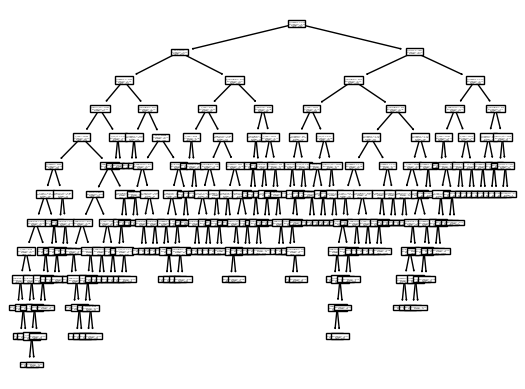

In [143]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
treeG=tree.DecisionTreeRegressor(max_depth=25, max_leaf_nodes=138)
treeG.fit(X_train,Y_train)
plot_tree(treeG,feature_names=dfX.columns.tolist());
plt.show()

### Random Forest Regression

In [148]:
from sklearn import ensemble
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Create a pipeline with StandardScaler and RandomForestRegressor
RFreg = make_pipeline(
    StandardScaler(), 
    ensemble.RandomForestRegressor(n_estimators=500, 
   criterion='squared_error', max_depth=None,
   min_samples_split=2, min_samples_leaf=1, 
   max_features='log2', max_leaf_nodes=None,
   bootstrap=True, oob_score=True)
)

# Fit the pipeline on the training data
RFreg.fit(X_train, Y_train)

# Predict on the testing set
y_pred_RFreg = RFreg.predict(X_test)

# Calculate MSE
mse_RFreg = mean_squared_error(Y_test, y_pred_RFreg)

# Print MSE
print("MSE: ", mse_RFreg)

# Access the RandomForestRegressor inside the pipeline to get the OOB score
oob_score = RFreg.named_steps['randomforestregressor'].oob_score_
print("OOB score: ", 1 - oob_score)

# Get parameters of the pipeline
params = RFreg.get_params()
print(params)


MSE:  0.01802103437055347
OOB score:  0.0035442688735949357
{'memory': None, 'steps': [('standardscaler', StandardScaler()), ('randomforestregressor', RandomForestRegressor(max_features='log2', n_estimators=500, oob_score=True))], 'verbose': False, 'standardscaler': StandardScaler(), 'randomforestregressor': RandomForestRegressor(max_features='log2', n_estimators=500, oob_score=True), 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'randomforestregressor__bootstrap': True, 'randomforestregressor__ccp_alpha': 0.0, 'randomforestregressor__criterion': 'squared_error', 'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 'log2', 'randomforestregressor__max_leaf_nodes': None, 'randomforestregressor__max_samples': None, 'randomforestregressor__min_impurity_decrease': 0.0, 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__min_weight_fraction_leaf': 

We try to tune the parameter **max_feature**

In [153]:
param=[{"max_features":list(range(2,10,1))}]
rf= GridSearchCV(ensemble.RandomForestRegressor(n_estimators=100),
        param,cv=5,n_jobs=-1)
rfOpt=rf.fit(X_train, Y_train)
# paramètre optimal
print("Best score = %f, Best paramètre = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

Best score = 0.003940, Best paramètre = {'max_features': 7}


In [160]:
# Predict on the testing set
y_pred_RFreg = rfOpt.predict(X_test)

# Calculate MSE
mse_RFreg = mean_squared_error(Y_test, y_pred_RFreg)

# Print MSE
print("MSE: ", mse_RFreg)

MSE:  0.018918180952946284


In [156]:
rf= ensemble.RandomForestRegressor(n_estimators=100,max_features=7)
rfFit=rf.fit(X_train, Y_train)
# Importance décroissante des variables
importances = rfFit.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print(dfX.columns[indices[f]], importances[indices[f]])

L_RenewElec 0.23699325555552658
Lat 0.16109495784648292
L_NuclElec 0.15929077070338768
L_Area 0.13341640723884812
S_LowCarbElec 0.06856964396669474
L_EnerCons/cpt 0.06508241265881988
S_%RenewEner 0.042917455906804625
S_ElecAcce 0.03704089810289272
L_PopDens 0.026861708623719643
L_GDP/cpt 0.020863945937298442
Long 0.020612938424195554
S_CleFueAcce 0.014827565476472248
L_EnerIntens 0.011084160293393153
gdp_growth 0.0013438792654638244


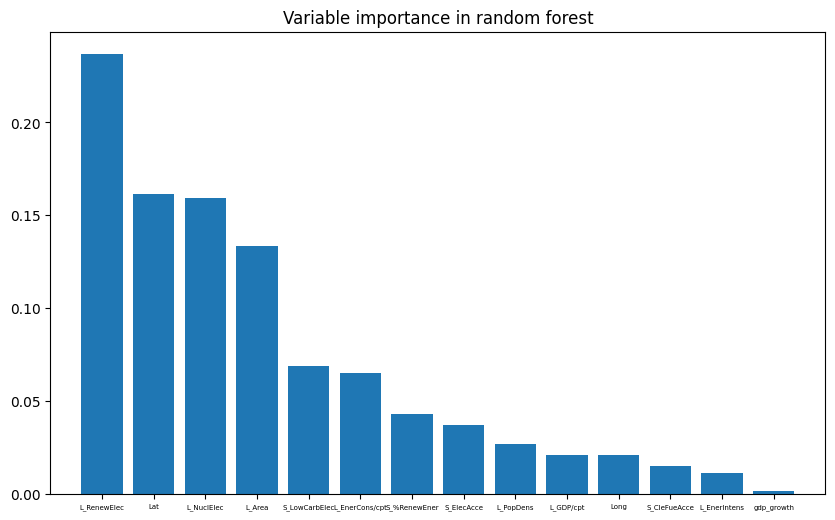

In [198]:
# Graphe des importances
plt.figure(figsize = (10,6))
plt.title("Variable importance in random forest")
plt.bar(range(X_train.shape[1]), importances[indices]);
plt.xticks(range(X_train.shape[1]), dfX.columns[indices], fontsize=5);
plt.xlim([-1, X_train.shape[1]]);
plt.show()

### Gradient Boosting Regression

In [159]:
GradBst_reg = make_pipeline(StandardScaler(), ensemble.GradientBoostingRegressor())
GradBst_reg.fit(X_train, Y_train)
# Predict on the testing set
y_pred_GradBst_reg = GradBst_reg.predict(X_test)
# Calculate MSE
mse_GradBst_reg = mean_squared_error(Y_test, y_pred_GradBst_reg)
# Print MSE
print("MSE: ", mse_GradBst_reg)
params = GradBst_reg.get_params()
print(params)

MSE:  0.07995977981520581
{'memory': None, 'steps': [('standardscaler', StandardScaler()), ('gradientboostingregressor', GradientBoostingRegressor())], 'verbose': False, 'standardscaler': StandardScaler(), 'gradientboostingregressor': GradientBoostingRegressor(), 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'gradientboostingregressor__alpha': 0.9, 'gradientboostingregressor__ccp_alpha': 0.0, 'gradientboostingregressor__criterion': 'friedman_mse', 'gradientboostingregressor__init': None, 'gradientboostingregressor__learning_rate': 0.1, 'gradientboostingregressor__loss': 'squared_error', 'gradientboostingregressor__max_depth': 3, 'gradientboostingregressor__max_features': None, 'gradientboostingregressor__max_leaf_nodes': None, 'gradientboostingregressor__min_impurity_decrease': 0.0, 'gradientboostingregressor__min_samples_leaf': 1, 'gradientboostingregressor__min_samples_split': 2, 'gradientboostingregressor__min_weight_fraction_leaf

In [245]:
# Default parameter
params = {
    "n_estimators": 100,
    "max_depth": 3,
    "min_samples_split": 2,
    "learning_rate": 0.1,
    "loss": "squared_error",
}
GradBst_reg = ensemble.GradientBoostingRegressor(**params)
GradBst_reg.fit(X_train, Y_train)

mse = mean_squared_error(Y_test, GradBst_reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.0789


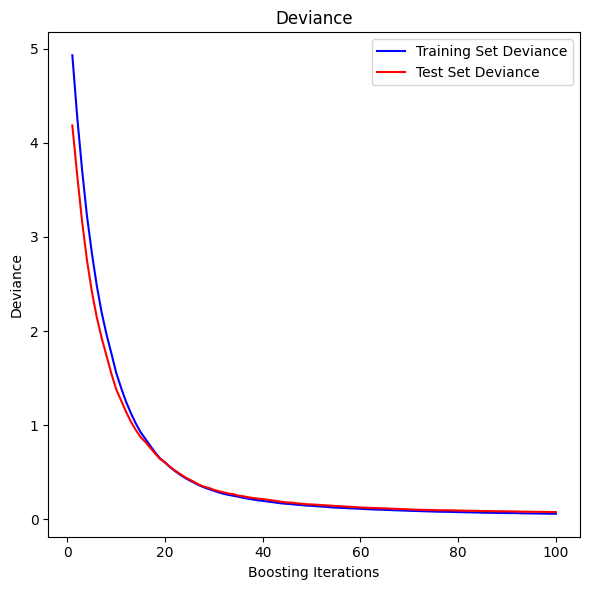

In [246]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred_bst in enumerate(GradBst_reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(Y_test, y_pred_bst)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    GradBst_reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

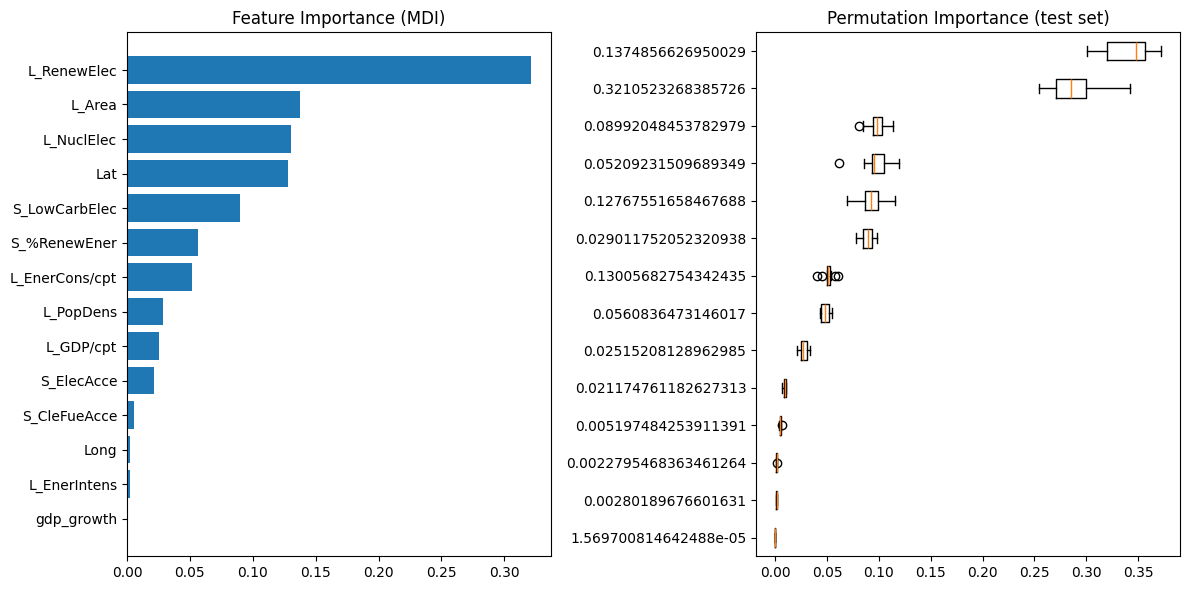

In [251]:
from sklearn.inspection import permutation_importance

feature_importance = GradBst_reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, dfX.columns[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    GradBst_reg, X_test, Y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=feature_importance[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

Tuning parameter with GridsearchCV

In [164]:
from sklearn.model_selection import RepeatedKFold
# Tuning parameters
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.001, 0.01, 0.1, 1.0]
grid['subsample'] = [0.5, 0.7, 1.0]
grid['max_depth'] = [3, 7, 9]
# define the evaluation procedure
cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=ensemble.GradientBoostingRegressor(), param_grid=grid, n_jobs=-1, cv=cv)
# execute the grid search
grid_result = grid_search.fit(X_train, Y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) # summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.995694 using {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 500, 'subsample': 0.5}
0.012789 (0.001106) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.5}
0.012762 (0.001128) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.7}
0.012781 (0.001315) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 1.0}
0.067571 (0.001903) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.5}
0.067944 (0.001743) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}
0.067735 (0.002546) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
0.131257 (0.002911) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
0.131296 (0.003057) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
0.131027 (0.003908) with: {'learning_rate': 0.001, 'max_de

We derive the best parameter of {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 500, 'subsample': 0.5}

In [166]:
## Predict with test set
y_pred_Grad_Bst = grid_result.predict(X_test)

## Calculate MSE
print("MSE: ", mean_squared_error(y_pred_Grad_Bst, Y_test))

MSE:  0.019249866681743333


### Neural Network regression

We could use Multi-layer Perceptron regressor

In [167]:
from sklearn import neural_network as nn
NN_reg = make_pipeline(StandardScaler(), nn.MLPRegressor(max_iter = 1000)) # Raising the maximum iteration to 1000
NN_reg.fit(X_train, Y_train)
# Predicting on the testing set
y_pred_NN_reg = NN_reg.predict(X_test)
# Calculate MSE
mse_NN_reg = mean_squared_error(Y_test, y_pred_NN_reg)
# Print MSE
print("MSE: ", mse_NN_reg)

MSE:  0.02398911369809242


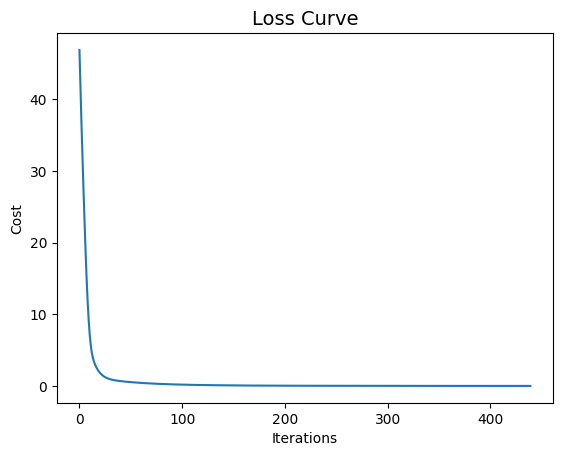

In [253]:
# Plot the loss curve
plt.plot(NN_reg.named_steps['mlpregressor'].loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

We try to tune the number of hidden layers

In [173]:
param_grid={"hidden_layer_sizes":list([(5,),(6,),(7,),(8,)])}
grid_search = GridSearchCV(nn.MLPRegressor(), param_grid)
grid_result = grid_search.fit(X_train, Y_train)
# summarize the best score and configuration
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

In [174]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) # summarize all scores that were evaluated
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.867450 using {'hidden_layer_sizes': (7,)}
0.796815 (0.053024) with: {'hidden_layer_sizes': (5,)}
0.704994 (0.353057) with: {'hidden_layer_sizes': (6,)}
0.867450 (0.041294) with: {'hidden_layer_sizes': (7,)}
0.812792 (0.041786) with: {'hidden_layer_sizes': (8,)}


In [175]:
# Predicting on the testing set
y_pred_NN = grid_search.predict(X_test)
# Calculate MSE
print("MSE: ", mean_squared_error(Y_test, y_pred_NN_reg))

MSE:  0.02398911369809242


In [185]:
from sklearn.utils import check_random_state
import time
check_random_state(13)
tps0=time.perf_counter()
# Estimators define
cart = tree.DecisionTreeRegressor()
nnet = nn.MLPRegressor(max_iter=600)
rf   = ensemble.RandomForestRegressor(n_estimators=100)
svm  = SVR()
# Number of iterations
B=3 
# Define grid of parameters
listMethGrid=[[svm,{"C":[0.4,0.5,0.6,0.8,1,1.4]}],
    [rf,{"max_features":list(range(2,10,2))}],
    [nnet,{"hidden_layer_sizes":list([(5,),(6,),(7,),(8,)])}],
    [cart,{"max_depth":list(range(2,10))}]]
# Initialization of error to 0
arrayErreur=np.empty((B,4))
for i in range(B):   # Iterations on echatilon test
    # Tran test split
    X_train,X_test,Y_train,Y_test=train_test_split(dfX,Y,test_size=200)
    scaler = StandardScaler()  
    scaler.fit(X_train)  
    X_train = scaler.transform(X_train)  
    # Same transformation on test set
    X_test = scaler.transform(X_test)
    # Optimization of each method and calculate the error on test set
    for j,(method, grid_list) in enumerate(listMethGrid):
        methodGrid=GridSearchCV(method,grid_list,cv=10,n_jobs=-1).fit(X_train, Y_train)
        methodOpt = methodGrid.best_estimator_
        methFit=methodOpt.fit(X_train, Y_train)
        arrayErreur[i,j]=1-methFit.score(X_test,Y_test)
tps1=time.perf_counter()
print("Time execution :",(tps1 - tps0))
dataframeErreur=pd.DataFrame(arrayErreur,columns=["SVM","RF","NN","Tree"])    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

Time execution : 90.22286701900885


In [186]:
print(dataframeErreur)

        SVM        RF        NN      Tree
0  0.021638  0.002460  0.010903  0.037779
1  0.004448  0.002439  0.011189  0.022596
2  0.008065  0.002481  0.019926  0.011381


* A more sophisticated method, here *SVM* or *random forest* provides a statistically significant but fairly weak improvement at the cost of the fine interpretation of the results provided by logistic regression.
* Random forests and SVMs do better in this example, this is often the case as with *boosting*, but other examples highlight other methods: neurons for physical modeling, SVM for virtual screening of molecules, PLS regression for near-infra-red (NIR) spectrometry... no general rule.

## Comparison to Explanatory Data Analysis

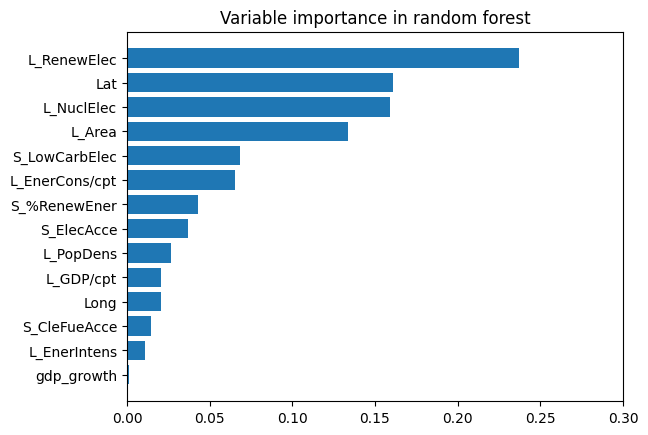

Text(0.5, 1.0, 'Feature Importance (MDI) of GD')

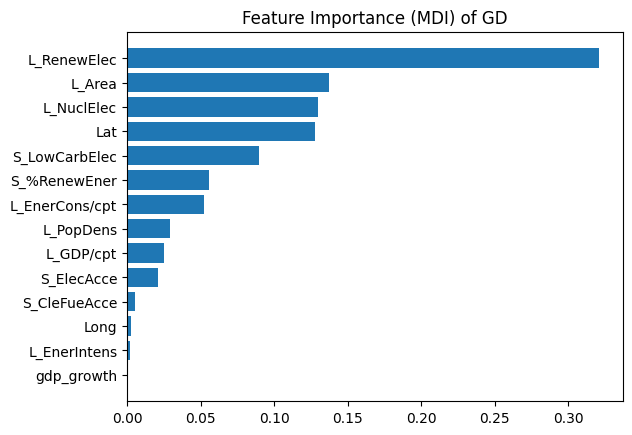

In [277]:
# Graphe des importances of RF
indices = np.argsort(importances)[::1]
plt.title("Variable importance in random forest")
plt.barh(range(X_train.shape[1]), importances[indices], align="center");
plt.yticks(range(X_train.shape[1]), dfX.columns[indices]);
plt.xlim([0, 0.3]);
plt.show()
specific_column = 'L_CO2_emit'

feature_importance = GradBst_reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, dfX.columns[sorted_idx])
plt.title("Feature Importance (MDI) of GD")

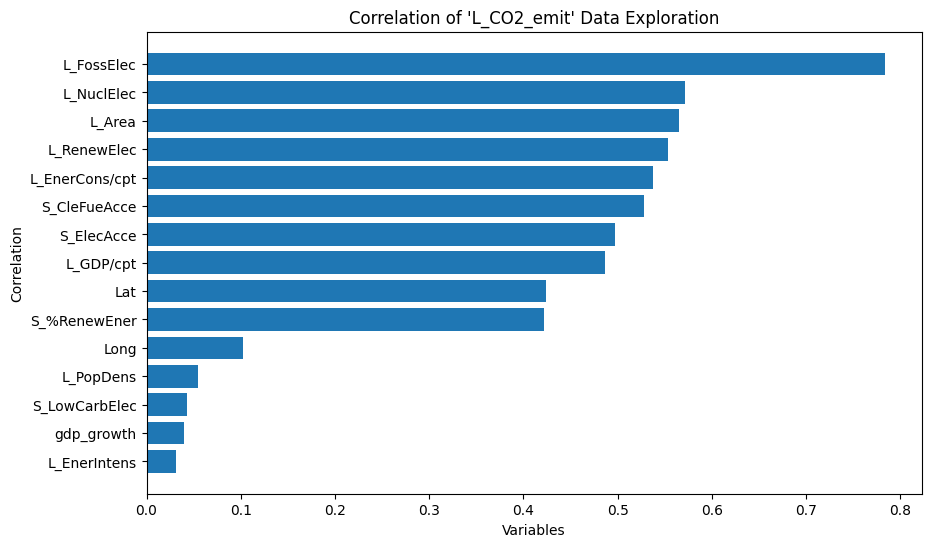

In [280]:
correlations = globDatTrans.select_dtypes(include='float64').corr()[specific_column].drop(specific_column)
correlations = correlations.abs().sort_values(ascending=True)
plt.figure(figsize=(10, 6))
plt.title(f"Correlation of '{specific_column}' Data Exploration")
plt.barh(range(len(correlations)), correlations.values, align="center")
plt.yticks(range(len(correlations)), correlations.index)  
plt.xlabel('Variables')
plt.ylabel('Correlation')
plt.show()

We can see there are some differences in variables' importance. The Random Forest Regressor has valued the variance "S_LowCarbElec" significantly, while assessed the variance of GDP growth as almost uninfluenced.

## Conclusion on the project

To conclude, we can use several methods to predict one variable. Some of them have quite similar results and errors as Random Forest and Boosting for our case. It is important to adapt the method with the dataset and the variable we want to predict. For example, the linear regression is really easy to interpret and can have really good results for some dataset but for our, it was not the best choice.

Some variables were, for multiple methods and criterias, variables of importance, L.Area and L.PopDens for example. Those describe the total land area and the population density. The variable we wanted to predict is the one we named LCO2_emit which describes the carbon dioxide emission. It it thus not suprising that it is related to the previous variables. 